<a href="https://colab.research.google.com/github/femartinsamorim/programacao-pratica_e_treinamento/blob/main/tera_desafio_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANDO AS BIBLIOTECAS QUE SERÃO UTILIZADA NA ANÁLISE E CONSTRUÇÃO DOS MODELOS

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import missingno as msno
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
# CARREGAMENTO DA BASE DE DADOS QUE SERÁ UTILIZADA

# base_enem = pd.read_csv('/content/Base de dados do Enem.csv', delimiter=',')
base_enem = pd.read_csv('/content/Base de dados do Enem - Copia.csv', delimiter=',')

base_enem.head(5)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_MEDIA
0,210054403757,2021,14,M,2,3,1,1,15,1,...,A,A,B,A,A,B,A,A,A,NaN
1,210053662224,2021,5,F,1,3,1,1,4,1,...,A,A,B,A,A,C,A,B,B,546.56
2,210053154359,2021,14,F,0,3,1,1,12,1,...,A,A,B,A,A,B,A,A,A,431.38
3,210054036560,2021,3,F,1,4,1,2,0,2,...,A,A,B,A,A,C,A,A,B,565.80
4,210051462654,2021,2,F,1,4,1,2,0,3,...,A,A,E,A,A,E,A,B,B,576.12


In [4]:
# ANALISANDO ALGUMAS INFORMAÇÕES IMPORTANTES SOBRE A BASE DE DADOS IMPORTADA

print(f'A BASE DE DADOS IMPORTADA POSSUI UMA QUANTIDADE DE "{base_enem.shape[0]}" LINHAS, E DE "{base_enem.shape[1]}" COLUNAS')

A BASE DE DADOS IMPORTADA POSSUI UMA QUANTIDADE DE "50919" LINHAS, E DE "77" COLUNAS


In [5]:
base_enem.isnull().sum().sort_values(ascending=False)

TP_DEPENDENCIA_ADM_ESC    36172
TP_SIT_FUNC_ESC           36172
TP_LOCALIZACAO_ESC        36172
CO_MUNICIPIO_ESC          36172
NO_MUNICIPIO_ESC          36172
                          ...  
TP_SEXO                       0
TP_FAIXA_ETARIA               0
TP_ESCOLA                     0
Q001                          0
NU_INSCRICAO                  0
Length: 77, dtype: int64

In [6]:
base_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50919 entries, 0 to 50918
Data columns (total 77 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            50919 non-null  int64  
 1   NU_ANO                  50919 non-null  int64  
 2   TP_FAIXA_ETARIA         50919 non-null  int64  
 3   TP_SEXO                 50919 non-null  object 
 4   TP_ESTADO_CIVIL         50919 non-null  int64  
 5   TP_COR_RACA             50919 non-null  int64  
 6   TP_NACIONALIDADE        50919 non-null  int64  
 7   TP_ST_CONCLUSAO         50919 non-null  int64  
 8   TP_ANO_CONCLUIU         50919 non-null  int64  
 9   TP_ESCOLA               50919 non-null  int64  
 10  TP_ENSINO               21332 non-null  float64
 11  IN_TREINEIRO            50919 non-null  int64  
 12  CO_MUNICIPIO_ESC        14747 non-null  float64
 13  NO_MUNICIPIO_ESC        14747 non-null  object 
 14  CO_UF_ESC               14747 non-null

Analisando o dicionário disponível e já entendendo quais variáveis serão de interesse, seguiremos com o tratamento apenas de algumas dessas colunas presentes na base de dados.

In [7]:
# RENOMEANDO AS VARIAVÉIS DE INTERESSE

base_enem_renomeada = base_enem.rename(columns={'NU_INSCRICAO':'INSCRICAO',
                                                'TP_FAIXA_ETARIA':'FAIXA_ETARIA',
                                                'TP_SEXO':'SEXO',
                                                'TP_ESTADO_CIVIL':'ESTADO_CIVIL',
                                                'TP_COR_RACA':'RACA',
                                                'TP_NACIONALIDADE':'NACIONALIDADE',
                                                'TP_ST_CONCLUSAO':'CONCLUSAO_EM',
                                                'TP_ANO_CONCLUIU':'ANO_CONCLUSAO_EM',
                                                'TP_ESCOLA':'TIPO_ESCOLA',
                                                'TP_ENSINO':'TIPO_ENSINO',
                                                'IN_TREINEIRO':'INTUITO_DE_TREINAMENTO',
                                                'NU_NOTA_CN':'NOTA_CIENCIA_NAT',
                                                'NU_NOTA_CH':'NOTA_CIENCIA_HUM',
                                                'NU_NOTA_LC':'NOTA_LINGUAGENS_COD',
                                                'NU_NOTA_MT':'NOTA_MATEMATICA',
                                                'NU_NOTA_REDACAO':'NOTA_REDACAO',
                                                'Q005':'QTD.MORADORES_RESIDENCIA',
                                                'Q006':'RENDA_FAMILIA',
                                                'Q024':'QTD.COMPUTADORES_RESIDENCIA',
                                                'Q025':'INTERNET_RESIDENCIA'})

In [8]:
base_enem_renomeada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50919 entries, 0 to 50918
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   INSCRICAO                    50919 non-null  int64  
 1   NU_ANO                       50919 non-null  int64  
 2   FAIXA_ETARIA                 50919 non-null  int64  
 3   SEXO                         50919 non-null  object 
 4   ESTADO_CIVIL                 50919 non-null  int64  
 5   RACA                         50919 non-null  int64  
 6   NACIONALIDADE                50919 non-null  int64  
 7   CONCLUSAO_EM                 50919 non-null  int64  
 8   ANO_CONCLUSAO_EM             50919 non-null  int64  
 9   TIPO_ESCOLA                  50919 non-null  int64  
 10  TIPO_ENSINO                  21332 non-null  float64
 11  INTUITO_DE_TREINAMENTO       50919 non-null  int64  
 12  CO_MUNICIPIO_ESC             14747 non-null  float64
 13  NO_MUNICIPIO_ESC

In [9]:
# INSERINDO AS VARIAVÉIS DE INTERESSE EM UMA NOVA BASE

base_enem_definitiva = base_enem_renomeada[{'INSCRICAO',
                                            'FAIXA_ETARIA',
                                            'SEXO',
                                            'ESTADO_CIVIL',
                                            'RACA',
                                            'NACIONALIDADE',
                                            'CONCLUSAO_EM',
                                            'ANO_CONCLUSAO_EM',
                                            'TIPO_ESCOLA',
                                            'TIPO_ENSINO',
                                            'INTUITO_DE_TREINAMENTO',
                                            'NOTA_CIENCIA_NAT',
                                            'NOTA_CIENCIA_HUM',
                                            'NOTA_LINGUAGENS_COD',
                                            'NOTA_MATEMATICA',
                                            'NOTA_REDACAO',
                                            'QTD.MORADORES_RESIDENCIA',
                                            'RENDA_FAMILIA',
                                            'QTD.COMPUTADORES_RESIDENCIA',
                                            'INTERNET_RESIDENCIA'}]

base_enem_definitiva.head(5)

,FAIXA_ETARIA,INTERNET_RESIDENCIA,NACIONALIDADE,ESTADO_CIVIL,SEXO,NOTA_CIENCIA_NAT,QTD.MORADORES_RESIDENCIA,TIPO_ESCOLA,ANO_CONCLUSAO_EM,RACA,INTUITO_DE_TREINAMENTO,INSCRICAO,NOTA_REDACAO,NOTA_CIENCIA_HUM,RENDA_FAMILIA,QTD.COMPUTADORES_RESIDENCIA,CONCLUSAO_EM,TIPO_ENSINO,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
0,14,A,1,2,M,NaN,4.0,1,15,3,0,210054403757,NaN,NaN,F,A,1,NaN,NaN,NaN
1,5,B,1,1,F,407.8,6.0,1,4,3,0,210053662224,840.0,555.2,B,B,1,NaN,555.3,374.5
2,14,A,1,0,F,446.7,2.0,1,12,3,0,210053154359,420.0,466.5,B,A,1,NaN,375.1,448.6
3,3,B,1,1,F,363.8,3.0,2,0,4,0,210054036560,760.0,572.1,C,A,2,1.0,522.8,610.3
4,2,B,1,1,F,441.2,8.0,3,0,4,0,210051462654,940.0,420.6,E,B,2,1.0,497.5,581.3


In [10]:

print(f'QUANTIDADE DE COLUNAS (ANTES): {base_enem_renomeada.shape[1]}'),
print(f'QUANTIDADE DE COLUNAS (DEPOIS): {base_enem_definitiva.shape[1]}')

QUANTIDADE DE COLUNAS (ANTES): 77
QUANTIDADE DE COLUNAS (DEPOIS): 20


In [ ]:
# SE PRECISAR PODEMOS SALVAR A BASE TRATADA EM UM NOVO ARQUIVO

# base_enem_definitiva.to_csv('base_enem_tratada.csv')

Concluído o processo anterior, seguiremos com explorações mais profundas nas variáveis de interesse, procurando dados que necessitem de tratamento ou análise.

In [12]:
# VERIFICANDO QUAIS DADOS NECESSITAM DE TRATAMENTOS, PARA ISSO ESTAREI VERIFICANDO A EXISTÊNCIA DE REGISTROS NULOS

round(100*base_enem_definitiva.isnull().sum()/base_enem_definitiva.shape[0],2)

FAIXA_ETARIA                    0.00
INTERNET_RESIDENCIA             0.00
NACIONALIDADE                   0.00
ESTADO_CIVIL                    0.00
SEXO                            0.00
NOTA_CIENCIA_NAT               25.57
QTD.MORADORES_RESIDENCIA        0.00
TIPO_ESCOLA                     0.00
ANO_CONCLUSAO_EM                0.00
RACA                            0.00
INTUITO_DE_TREINAMENTO          0.00
INSCRICAO                       0.00
NOTA_REDACAO                   21.94
NOTA_CIENCIA_HUM               21.94
RENDA_FAMILIA                   0.00
QTD.COMPUTADORES_RESIDENCIA     0.00
CONCLUSAO_EM                    0.00
TIPO_ENSINO                    58.11
NOTA_LINGUAGENS_COD            21.94
NOTA_MATEMATICA                25.57
dtype: float64

In [13]:
base_enem_definitiva['TIPO_ENSINO'].unique()

array([nan,  1.,  2.])

In [14]:
# A COLUNA 'TIPO_ENSINO' POSSUI UMA QUANTIDADE ALTA DE REGISTROS NULOS E NÃO SERÁ INTERESSANTE PARA ANALISAR OU TRATAR, ENTÃO SERÁ EXCLUÍDA:

base_enem_definitiva = base_enem_definitiva.drop(columns=['TIPO_ENSINO'])

base_enem_definitiva.head(5)

,FAIXA_ETARIA,INTERNET_RESIDENCIA,NACIONALIDADE,ESTADO_CIVIL,SEXO,NOTA_CIENCIA_NAT,QTD.MORADORES_RESIDENCIA,TIPO_ESCOLA,ANO_CONCLUSAO_EM,RACA,INTUITO_DE_TREINAMENTO,INSCRICAO,NOTA_REDACAO,NOTA_CIENCIA_HUM,RENDA_FAMILIA,QTD.COMPUTADORES_RESIDENCIA,CONCLUSAO_EM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
0,14,A,1,2,M,NaN,4.0,1,15,3,0,210054403757,NaN,NaN,F,A,1,NaN,NaN
1,5,B,1,1,F,407.8,6.0,1,4,3,0,210053662224,840.0,555.2,B,B,1,555.3,374.5
2,14,A,1,0,F,446.7,2.0,1,12,3,0,210053154359,420.0,466.5,B,A,1,375.1,448.6
3,3,B,1,1,F,363.8,3.0,2,0,4,0,210054036560,760.0,572.1,C,A,2,522.8,610.3
4,2,B,1,1,F,441.2,8.0,3,0,4,0,210051462654,940.0,420.6,E,B,2,497.5,581.3


In [15]:
# SERÁ NECESSÁRIO ANALISAR AS VARIAVÉIS DE NOTA PARA TRATAR OS NULOS

round(100*base_enem_definitiva.isnull().sum().sort_values()/base_enem_definitiva.shape[0],2)

FAIXA_ETARIA                    0.00
CONCLUSAO_EM                    0.00
QTD.COMPUTADORES_RESIDENCIA     0.00
RENDA_FAMILIA                   0.00
INSCRICAO                       0.00
INTUITO_DE_TREINAMENTO          0.00
ANO_CONCLUSAO_EM                0.00
RACA                            0.00
QTD.MORADORES_RESIDENCIA        0.00
SEXO                            0.00
ESTADO_CIVIL                    0.00
NACIONALIDADE                   0.00
INTERNET_RESIDENCIA             0.00
TIPO_ESCOLA                     0.00
NOTA_LINGUAGENS_COD            21.94
NOTA_REDACAO                   21.94
NOTA_CIENCIA_HUM               21.94
NOTA_CIENCIA_NAT               25.57
NOTA_MATEMATICA                25.57
dtype: float64

Observações preliminares sobre as variáveis de notas::


*   A porcentagem de nulos para as provas de ciências humanas, linguagens e redação são iguais.

*   A porcentagem de nulos para ciências da natureza e matemática são iguais e maior que as outras citadas.

*   As provas do ENEM são divididas em (humanas/linguagem/redação) no primeiro dia e em (natureza/matemática) no segundo dia, sendo assim já podemos ver que no primeiro dia ocorreu um número maior de participantes (**Referência:** https://vestibular.brasilescola.uol.com.br/enem/quantas-questoes-tem-enem-como-funciona-prova.htm)

*   Geralmente já sabemos que o segundo dia de ENEM possui uma quantidade menor de participantes, por motivos como desistência e até mesmo a falta de interesse, mas para uma resposta assertiva se a ausência está ligada a desistências, problemas particulares ou imprevistos seria necessário realizar análises estatísticas mais profundas em uma base mais voltada para as característica/questiónarios dos participantes.









In [17]:
# PARA ANALISAR A SITUAÇÃO DAS NOTAS, OPTEI POR CRIAR UMA VARIÁVEL PARA DEFINIR COMO TRATA-LAS

analise_notas = base_enem_definitiva[{'NOTA_LINGUAGENS_COD',
                                      'NOTA_CIENCIA_HUM',
                                      'NOTA_REDACAO',
                                      'NOTA_CIENCIA_NAT',
                                      'NOTA_MATEMATICA'}]

Para seguir com o tratamentos das variavéis de nota foi necessário uma pesquisa simples apenas para entender como são as regras do ENEM para tratar casos de ausência do participante e motivos para zerar a nota.

Realizando a pesquisa foi possível chegar na seguinte conclusão para utilização no tratamento dos dados:

*   Zerar a redação é critério para eliminação, então é possível considerar que participantes que tirarem zero na redação não terão direito a participar das bolsas. As outras matérias possuem critérios de avaliação diferente que impossibilita zera-las, o participante só não obterá nota nelas no caso de não comparecimento.

*   Ausências podem ser justificadas desde que não ocorra no dia da redação, ou seja, o participante poderá continuar concorrendo as bolsa desde que não se ausente no dia ocorrer a prova de redação. Neste caso eliminarei apenas as colunas "nulas" que possuem o campo de redação "nulo" também.

*   **Importante**: Analisando a base de dados foi possível identificar que alguns participantes que tiraram zero na redação possuíram notas em outras matérias, então nestes casos não poderemos considerar como uma pessoa ausente, pois o participante esteve presente no local, inclusive preenchedo o questionário como será apresentado em alguns gráficos. Dentre as refências é citado alguns motivos que podem levar ao participar tirar zero redação.


**Referência**: https://vestibulares.estrategia.com/portal/enem-e-vestibulares/enem/o-que-acontece-se-faltar-ao-enem/#:~:text=Os%20candidatos%20que%20faltaram%20nos,n%C3%A3o%20tenham%20zerado%20a%20reda%C3%A7%C3%A3o

**Referência**: https://www.mundovestibular.com.br/blog/7-motivos-para-tirar-zero-na-redacao-do-enem

In [18]:
# ANALISANDO TODOS OS PARTICIPANTES QUE RECEBERAM A NOTA ZERO EM REDAÇÃO:

notas_redacao_zero = analise_notas.loc[(analise_notas['NOTA_REDACAO'] == 0)]

notas_redacao_zero.head(15)

,NOTA_CIENCIA_NAT,NOTA_REDACAO,NOTA_CIENCIA_HUM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
51,462.0,0.0,466.2,506.7,420.1
114,NaN,0.0,552.2,409.6,NaN
121,446.4,0.0,371.1,355.2,591.1
210,494.5,0.0,430.1,426.3,366.1
211,408.1,0.0,355.4,507.8,538.0
259,NaN,0.0,433.4,389.4,NaN
272,435.5,0.0,425.2,402.4,388.4
308,NaN,0.0,345.8,361.9,NaN
315,440.4,0.0,560.7,497.9,534.5
336,464.9,0.0,457.9,401.6,420.6


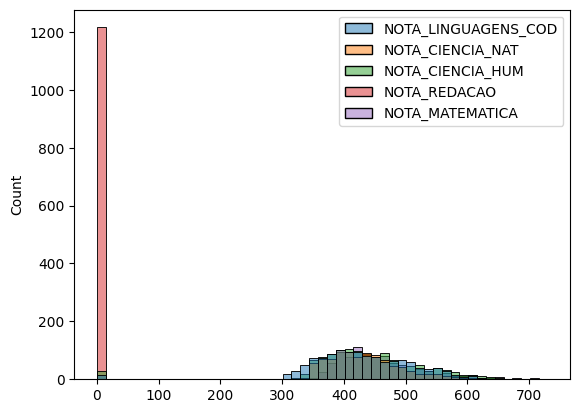

In [ ]:
sns.histplot(notas_redacao_zero, kde=False);
plt.show()

In [19]:
print(f'A QUANTIDADE DE PARTICIPANTES COM NOTAS DE REDAÇÃO IGUAL A ZERO É: {notas_redacao_zero.shape[0]}')

A QUANTIDADE DE PARTICIPANTES COM NOTAS DE REDAÇÃO IGUAL A ZERO É: 1216


Obtendo a quantidade de candidatos com a nota de redação igual a zero podemos então analisar dois cenários, mante-los na base de dados para tirar insights específicos ou então removê-los. Neste primeiro momento optei em retira-los da base de dados, porém como existe no dicionário disponibilizado e no dataset colunas (TP_PRESENCA_CN, TP_PRESENCA_CH, TP_PRESENCA_LC, TP_PRESENCA_MT, TP_STATUS_REDACAO) especificando o "status" das notas, poderemos utiliza-las para identificar o motivo das notas que foram zeradas.

In [20]:
# OPTAREI EM RETIRAR AS NOTAS IGUAIS A ZERO, MAS SALVANDO EM DATAFRAME ALTERNATIVO PARA INSIGHTS

base_enem_definitiva_redacao_zero = base_enem_definitiva.loc[(base_enem_definitiva['NOTA_REDACAO'] == 0)]
base_enem_definitiva_redacao_zero.head(5)

,FAIXA_ETARIA,INTERNET_RESIDENCIA,NACIONALIDADE,ESTADO_CIVIL,SEXO,NOTA_CIENCIA_NAT,QTD.MORADORES_RESIDENCIA,TIPO_ESCOLA,ANO_CONCLUSAO_EM,RACA,INTUITO_DE_TREINAMENTO,INSCRICAO,NOTA_REDACAO,NOTA_CIENCIA_HUM,RENDA_FAMILIA,QTD.COMPUTADORES_RESIDENCIA,CONCLUSAO_EM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
51,3,B,1,0,F,462.0,5.0,2,0,3,0,210052441805,0.0,466.2,B,B,2,506.7,420.1
114,4,B,1,1,M,NaN,12.0,2,0,3,0,210054295602,0.0,552.2,B,A,2,409.6,NaN
121,6,A,1,1,F,446.4,2.0,1,4,4,0,210054267271,0.0,371.1,A,A,1,355.2,591.1
210,2,B,1,1,F,494.5,4.0,2,0,3,0,210052240913,0.0,430.1,C,B,2,426.3,366.1
211,3,B,2,1,M,408.1,5.0,2,0,3,0,210053707419,0.0,355.4,C,B,2,507.8,538.0


In [21]:
base_enem_definitiva_redacao_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216 entries, 51 to 50868
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FAIXA_ETARIA                 1216 non-null   int64  
 1   INTERNET_RESIDENCIA          1216 non-null   object 
 2   NACIONALIDADE                1216 non-null   int64  
 3   ESTADO_CIVIL                 1216 non-null   int64  
 4   SEXO                         1216 non-null   object 
 5   NOTA_CIENCIA_NAT             911 non-null    float64
 6   QTD.MORADORES_RESIDENCIA     1216 non-null   float64
 7   TIPO_ESCOLA                  1216 non-null   int64  
 8   ANO_CONCLUSAO_EM             1216 non-null   int64  
 9   RACA                         1216 non-null   int64  
 10  INTUITO_DE_TREINAMENTO       1216 non-null   int64  
 11  INSCRICAO                    1216 non-null   int64  
 12  NOTA_REDACAO                 1216 non-null   float64
 13  NOTA_CIENCIA_HUM

Ao contrario dos participantes que compareceram no ENEM, mas tiraram zero na redação, temos as variáveis que possuem o campo de redação nulo. Essas linhas em nulo não terá interesse nenhum na análise, pois como citado, isso significa que o participante não esteve presente, gerando uma desclassificaçao automática. Poderia realizar tratamento desses campos para zerar todas as notas, mas para fazer mais sentido a situação real obtarei em exclui-los da base de dados.

In [22]:
# ANALISANDO TODOS OS PARTICIPANTES QUE RECEBERAM A NOTA NULA EM REDAÇÃO:

notas_redacao_nulas = analise_notas.loc[(analise_notas['NOTA_REDACAO'].isnull())]
notas_redacao_nulas.head(15)

,NOTA_CIENCIA_NAT,NOTA_REDACAO,NOTA_CIENCIA_HUM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN


In [23]:
print(f'A QUANTIDADE DE PARTICIPANTES COM NOTAS DE REDAÇÃO NULA É: {notas_redacao_nulas.shape[0]}')

A QUANTIDADE DE PARTICIPANTES COM NOTAS DE REDAÇÃO NULA É: 11172


In [24]:
notas_redacao_nulas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11172 entries, 0 to 50918
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOTA_CIENCIA_NAT     115 non-null    float64
 1   NOTA_REDACAO         0 non-null      float64
 2   NOTA_CIENCIA_HUM     0 non-null      float64
 3   NOTA_LINGUAGENS_COD  0 non-null      float64
 4   NOTA_MATEMATICA      115 non-null    float64
dtypes: float64(5)
memory usage: 523.7 KB


In [25]:
 notas_redacao_nulas.describe()

,NOTA_CIENCIA_NAT,NOTA_REDACAO,NOTA_CIENCIA_HUM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
count,115.000000,0.0,0.0,0.0,115.000000
mean,433.556522,NaN,NaN,NaN,467.300000
std,85.872791,NaN,NaN,NaN,107.897792
min,0.000000,NaN,NaN,NaN,0.000000
25%,392.950000,NaN,NaN,NaN,412.300000
50%,429.700000,NaN,NaN,NaN,449.700000
75%,476.050000,NaN,NaN,NaN,510.950000
max,612.800000,NaN,NaN,NaN,901.500000


In [26]:
# AS NOTAS NULAS SERÃO REMOVIDAS, MAS SALVAREI TAMBÉM EM UM DATAFRAME PARA FUTUROS INSIGHTS

base_enem_definitiva_redacao_nula = base_enem_definitiva.loc[(base_enem_definitiva['NOTA_REDACAO'].isnull())]
base_enem_definitiva_redacao_nula.head(5)

,FAIXA_ETARIA,INTERNET_RESIDENCIA,NACIONALIDADE,ESTADO_CIVIL,SEXO,NOTA_CIENCIA_NAT,QTD.MORADORES_RESIDENCIA,TIPO_ESCOLA,ANO_CONCLUSAO_EM,RACA,INTUITO_DE_TREINAMENTO,INSCRICAO,NOTA_REDACAO,NOTA_CIENCIA_HUM,RENDA_FAMILIA,QTD.COMPUTADORES_RESIDENCIA,CONCLUSAO_EM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
0,14,A,1,2,M,NaN,4.0,1,15,3,0,210054403757,NaN,NaN,F,A,1,NaN,NaN
7,3,B,1,1,F,NaN,6.0,2,0,2,0,210053781216,NaN,NaN,B,A,2,NaN,NaN
9,2,B,1,1,M,NaN,5.0,2,0,1,0,210054431053,NaN,NaN,F,B,2,NaN,NaN
12,1,A,1,1,F,NaN,4.0,1,0,3,0,210053741788,NaN,NaN,C,A,4,NaN,NaN
20,3,B,1,1,F,NaN,8.0,2,0,2,0,210054103983,NaN,NaN,A,B,2,NaN,NaN


Podemos observar que dentre todos registros de redação nulos possuem alguns registros com notas, analisando as matérias é possível concluir que esses participantes estiveram presentes apenas no segundo dia de prova. Neste caso continuarei com o processo de remoção, pois como citado a ausência no dia da redação é um critério de eliminação.

In [27]:
# PORCENTAGEM DOS REGISTROS NULOS POR CADA MATÈRIA

round(100*notas_redacao_nulas.isnull().sum().sort_values()/notas_redacao_nulas.shape[0],2)

NOTA_CIENCIA_NAT        98.97
NOTA_MATEMATICA         98.97
NOTA_REDACAO           100.00
NOTA_CIENCIA_HUM       100.00
NOTA_LINGUAGENS_COD    100.00
dtype: float64

In [28]:
# CRIAÇÃO DE UM DATAFRAME EXCLUÍNDO OS VALORES NULOS E ZERADOS EM REDAÇÃO

base_enem_definitiva_2 = base_enem_definitiva.loc[~(base_enem_definitiva['NOTA_REDACAO'].isnull()) & (base_enem_definitiva['NOTA_REDACAO'] != 0)]
base_enem_definitiva_2.head(5)

,FAIXA_ETARIA,INTERNET_RESIDENCIA,NACIONALIDADE,ESTADO_CIVIL,SEXO,NOTA_CIENCIA_NAT,QTD.MORADORES_RESIDENCIA,TIPO_ESCOLA,ANO_CONCLUSAO_EM,RACA,INTUITO_DE_TREINAMENTO,INSCRICAO,NOTA_REDACAO,NOTA_CIENCIA_HUM,RENDA_FAMILIA,QTD.COMPUTADORES_RESIDENCIA,CONCLUSAO_EM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
1,5,B,1,1,F,407.8,6.0,1,4,3,0,210053662224,840.0,555.2,B,B,1,555.3,374.5
2,14,A,1,0,F,446.7,2.0,1,12,3,0,210053154359,420.0,466.5,B,A,1,375.1,448.6
3,3,B,1,1,F,363.8,3.0,2,0,4,0,210054036560,760.0,572.1,C,A,2,522.8,610.3
4,2,B,1,1,F,441.2,8.0,3,0,4,0,210051462654,940.0,420.6,E,B,2,497.5,581.3
5,3,B,1,1,F,379.7,5.0,2,0,1,0,210051790169,500.0,362.3,B,A,2,360.1,439.1


In [29]:
base_enem_definitiva_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38531 entries, 1 to 50916
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FAIXA_ETARIA                 38531 non-null  int64  
 1   INTERNET_RESIDENCIA          38531 non-null  object 
 2   NACIONALIDADE                38531 non-null  int64  
 3   ESTADO_CIVIL                 38531 non-null  int64  
 4   SEXO                         38531 non-null  object 
 5   NOTA_CIENCIA_NAT             36871 non-null  float64
 6   QTD.MORADORES_RESIDENCIA     38531 non-null  float64
 7   TIPO_ESCOLA                  38531 non-null  int64  
 8   ANO_CONCLUSAO_EM             38531 non-null  int64  
 9   RACA                         38531 non-null  int64  
 10  INTUITO_DE_TREINAMENTO       38531 non-null  int64  
 11  INSCRICAO                    38531 non-null  int64  
 12  NOTA_REDACAO                 38531 non-null  float64
 13  NOTA_CIENCIA_HUM

In [30]:
print(f'A QUANTIDADE DE PARTICIPANTES PARA ANALISE SERÁ DE: {base_enem_definitiva_2.shape[0]}')

A QUANTIDADE DE PARTICIPANTES PARA ANALISE SERÁ DE: 38531


In [31]:
round(100*base_enem_definitiva_2.isnull().sum().sort_values()/base_enem_definitiva_2.shape[0],2)

FAIXA_ETARIA                   0.00
CONCLUSAO_EM                   0.00
QTD.COMPUTADORES_RESIDENCIA    0.00
RENDA_FAMILIA                  0.00
NOTA_CIENCIA_HUM               0.00
NOTA_REDACAO                   0.00
INSCRICAO                      0.00
INTUITO_DE_TREINAMENTO         0.00
NOTA_LINGUAGENS_COD            0.00
RACA                           0.00
TIPO_ESCOLA                    0.00
QTD.MORADORES_RESIDENCIA       0.00
SEXO                           0.00
ESTADO_CIVIL                   0.00
NACIONALIDADE                  0.00
INTERNET_RESIDENCIA            0.00
ANO_CONCLUSAO_EM               0.00
NOTA_CIENCIA_NAT               4.31
NOTA_MATEMATICA                4.31
dtype: float64

Conforme observado, ainda possuímos uma porcentagem pequena de registros nulos para as matérias de ciências das natureza e matemática. Como citado, essas matérias não possuem peso para desclassificação do participante, então decidirei mantê-las na base de dados, mas atribuirei o valor de zero nessas notas nulas para conseguir trabalhar com os modelos de regressão. Também decidi retirar a coluna "INSCRIÇÃO" pelo motivo de ser um campo que não terá importância de análise, assim evitamos a necessidade de transformação  com o LABELENCODER ou o ONE-HOT-ENCODING que iria gerar uma quantidade enorme de colunas.

In [32]:
# ALTERANDO TODOS OS VALORES NULOS (NOTA_CIENCIA_NAT/NOTA_MATEMATICA) PARA ZERO

base_enem_definitiva_2 = base_enem_definitiva_2.replace(np.nan, 0)
base_enem_definitiva_2.sum().isnull()

FAIXA_ETARIA                   False
INTERNET_RESIDENCIA            False
NACIONALIDADE                  False
ESTADO_CIVIL                   False
SEXO                           False
NOTA_CIENCIA_NAT               False
QTD.MORADORES_RESIDENCIA       False
TIPO_ESCOLA                    False
ANO_CONCLUSAO_EM               False
RACA                           False
INTUITO_DE_TREINAMENTO         False
INSCRICAO                      False
NOTA_REDACAO                   False
NOTA_CIENCIA_HUM               False
RENDA_FAMILIA                  False
QTD.COMPUTADORES_RESIDENCIA    False
CONCLUSAO_EM                   False
NOTA_LINGUAGENS_COD            False
NOTA_MATEMATICA                False
dtype: bool

In [33]:
# EXCLUÍNDO A COLUNA DE INSCRIÇÃO COMO CITADO:

base_enem_definitiva_2.drop(['INSCRICAO'], axis=1, inplace=True)

In [34]:
base_enem_definitiva_2.head(15)

,FAIXA_ETARIA,INTERNET_RESIDENCIA,NACIONALIDADE,ESTADO_CIVIL,SEXO,NOTA_CIENCIA_NAT,QTD.MORADORES_RESIDENCIA,TIPO_ESCOLA,ANO_CONCLUSAO_EM,RACA,INTUITO_DE_TREINAMENTO,NOTA_REDACAO,NOTA_CIENCIA_HUM,RENDA_FAMILIA,QTD.COMPUTADORES_RESIDENCIA,CONCLUSAO_EM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
1,5,B,1,1,F,407.8,6.0,1,4,3,0,840.0,555.2,B,B,1,555.3,374.5
2,14,A,1,0,F,446.7,2.0,1,12,3,0,420.0,466.5,B,A,1,375.1,448.6
3,3,B,1,1,F,363.8,3.0,2,0,4,0,760.0,572.1,C,A,2,522.8,610.3
4,2,B,1,1,F,441.2,8.0,3,0,4,0,940.0,420.6,E,B,2,497.5,581.3
5,3,B,1,1,F,379.7,5.0,2,0,1,0,500.0,362.3,B,A,2,360.1,439.1
6,2,B,1,1,F,543.5,3.0,2,0,1,0,640.0,559.9,C,A,2,540.6,541.2
8,2,B,1,1,F,408.8,5.0,1,0,2,1,780.0,479.9,C,B,3,498.0,455.8
10,13,B,1,1,M,465.4,3.0,1,15,3,0,660.0,394.6,A,B,1,474.5,436.3
11,4,A,1,1,M,468.2,4.0,1,1,3,0,600.0,549.3,F,A,1,472.3,455.8
13,2,A,1,1,F,603.1,5.0,2,0,1,0,760.0,662.3,C,A,2,619.3,565.9


In [35]:
analise_notas.describe()

,NOTA_CIENCIA_NAT,NOTA_REDACAO,NOTA_CIENCIA_HUM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
count,37897.000000,39747.000000,39747.000000,39747.000000,37897.000000
mean,486.936486,627.101920,517.676642,499.909236,530.132507
std,80.467150,189.961215,95.218294,78.525634,109.190688
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,426.600000,520.000000,444.200000,445.300000,441.500000
50%,475.400000,620.000000,518.100000,502.100000,507.700000
75%,538.000000,760.000000,585.800000,555.100000,604.800000
max,867.100000,980.000000,846.900000,758.400000,948.500000


Para finalizar o processo de tratativa das notas, será criada uma variável para gerar a média total das 5 notas, essa variável será tratada como nosso "TARGET" nas análises de regressão.

In [36]:
# CRIAÇÃO DA VARIÁVEL TARGET "MEDIA_NOTAS":

base_enem_definitiva_2['MEDIA_NOTAS'] = ( base_enem_definitiva_2['NOTA_LINGUAGENS_COD'] +
                                          base_enem_definitiva_2['NOTA_CIENCIA_HUM'] +
                                          base_enem_definitiva_2['NOTA_CIENCIA_NAT'] +
                                          base_enem_definitiva_2['NOTA_MATEMATICA'] +
                                          base_enem_definitiva_2['NOTA_REDACAO']) / 5

In [37]:
# INSERINDO A NOVA VARIÁVEL EM UM SET DE ANALISES:

analise_notas_completo = base_enem_definitiva_2[{ 'NOTA_LINGUAGENS_COD',
                                                  'NOTA_CIENCIA_HUM',
                                                  'NOTA_REDACAO',
                                                  'NOTA_CIENCIA_NAT',
                                                  'NOTA_MATEMATICA',
                                                  'MEDIA_NOTAS'}]

In [39]:
# RESULTADO FINAL DAS VARIÁVEIS DE NOTAS:

analise_notas_completo.describe().round(2)

,NOTA_CIENCIA_NAT,NOTA_REDACAO,NOTA_CIENCIA_HUM,MEDIA_NOTAS,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA
count,38531.00,38531.00,38531.00,38531.00,38531.00,38531.00
mean,467.36,646.89,520.18,529.14,502.11,509.17
std,126.60,156.27,94.01,97.52,77.27,152.06
min,0.00,40.00,0.00,96.00,0.00,0.00
25%,421.10,540.00,446.90,467.25,448.40,435.30
50%,472.60,620.00,521.00,522.84,504.10,503.40
75%,536.20,760.00,587.70,591.95,556.60,601.80
max,867.10,980.00,846.90,846.66,758.40,948.50


Apresentação de alguns gráficos com base nos resultados após tratamento das variáveis correspondentes as NOTAS do participante

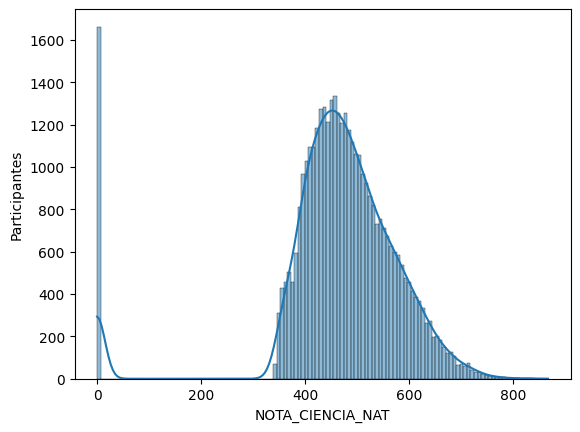

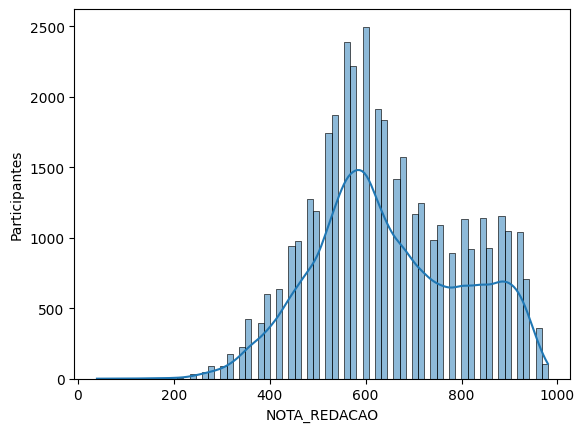

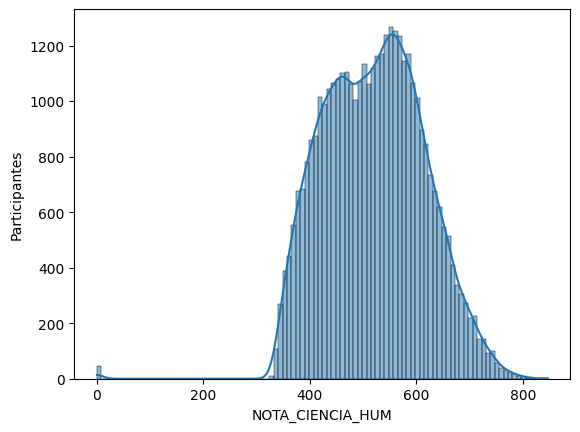

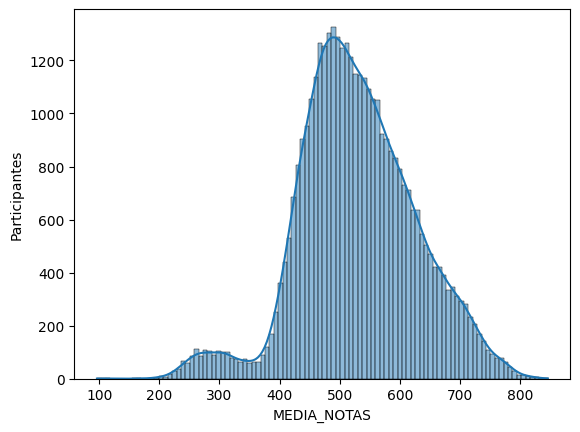

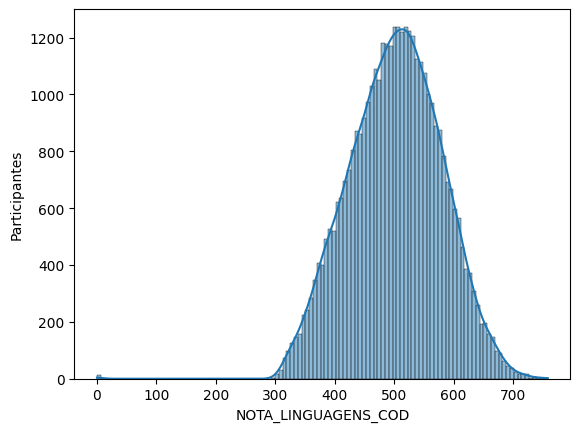

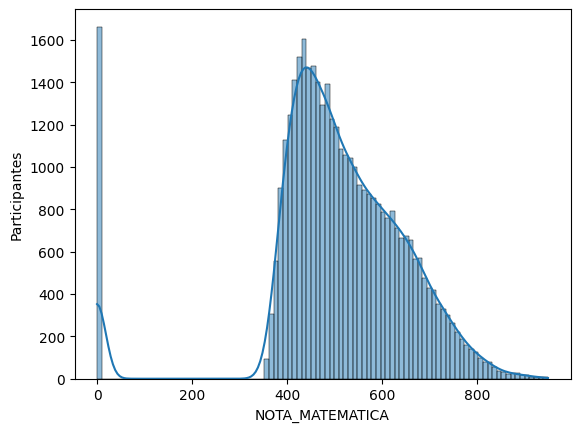

In [40]:
# PARA ANALISE DO GRÁFICO, OPTEI EM FAZER UM LOOP PASSANDO POR TODAS CATEGORIAS DE NOTAS

for notas in analise_notas_completo:
  sns.histplot(analise_notas_completo[notas], kde=True);
  plt.xlabel(notas)
  plt.ylabel('Participantes')
  plt.show()

Concluído o tratamento das NOTAS o proximo passo será o tratamentos das demais váriaveis, nessa etapa realizarei a alteração dos nomes atribuído as opções e realizarei o procedimento de ONE-HOT-ENCONDING nas váriaveis categoricas qualitativas.

In [41]:
# PARA GERAR GRÁFICOS E ANALISES ESPECÍFICAS, OPTEI EM FAZER MAIS UMA SEPARAÇÃO DAS VARIAVÉIS EM CATEGORIAS QUALITATIVAS

informacoes_partic_qual = base_enem_definitiva_2[{'SEXO',
                                                  'ESTADO_CIVIL',
                                                  'RACA',
                                                  'NACIONALIDADE',
                                                  'INTUITO_DE_TREINAMENTO'}]

informacoes_partic_qual_2 = base_enem_definitiva_2[{'FAIXA_ETARIA',
                                                    'CONCLUSAO_EM',
                                                    'ANO_CONCLUSAO_EM'}]

informacoes_gerais_qual = base_enem_definitiva_2[{'INTERNET_RESIDENCIA',
                                                  'QTD.COMPUTADORES_RESIDENCIA',
                                                  'RENDA_FAMILIA',
                                                  'TIPO_ESCOLA'}]


In [42]:
# ATRIBUIDO AS INFORMAÇÕES NAS VARIAVÉIS CATEGORICAS DE ACORDO COM DICIONÁRIO DISPONILIZADO (DADOS DO PARTICIPANTE - QUALITATIVOS):

informacoes_partic_qual = {'SEXO':
                          {'M':'Masculino','F':'Feminino'},
                          'ESTADO_CIVIL':
                            {0:'Não Informado',
                              1:'Solteiro(a)',
                              2:'Casado(a)',
                              3:'Divorciado(a)',
                              4:'Viuvo(a)'},
                            'RACA':
                            {0:'Não Informado',
                              1:'Branca',
                              2:'Preta',
                              3:'Parda',
                              4:'Amarela',
                              5:'Indígena',
                              6:'Não Sabe'},
                            'NACIONALIDADE':
                            {0:'Não Informado',
                              1:'Brasileiro(a)',
                              2:'Brasileiro_nat(a)',
                              3:'Estrangeiro(a)',
                              4:'Brasileiro_est(a)'},
                            'INTUITO_DE_TREINAMENTO':
                            {0:'Não',
                              1:'Sim'}
                        }

base_enem_definitiva_2 = base_enem_definitiva_2.replace(informacoes_partic_qual)
base_enem_definitiva_2[{'SEXO','ESTADO_CIVIL','RACA','NACIONALIDADE','INTUITO_DE_TREINAMENTO'}].head(15)

,NACIONALIDADE,ESTADO_CIVIL,SEXO,RACA,INTUITO_DE_TREINAMENTO
1,Brasileiro(a),Solteiro(a),Feminino,Parda,Não
2,Brasileiro(a),Não Informado,Feminino,Parda,Não
3,Brasileiro(a),Solteiro(a),Feminino,Amarela,Não
4,Brasileiro(a),Solteiro(a),Feminino,Amarela,Não
5,Brasileiro(a),Solteiro(a),Feminino,Branca,Não
6,Brasileiro(a),Solteiro(a),Feminino,Branca,Não
8,Brasileiro(a),Solteiro(a),Feminino,Preta,Sim
10,Brasileiro(a),Solteiro(a),Masculino,Parda,Não
11,Brasileiro(a),Solteiro(a),Masculino,Parda,Não
13,Brasileiro(a),Solteiro(a),Feminino,Branca,Não


In [43]:
# UNINDO AS CATEGORIAS EM COMUM DE RAÇA (DADOS DO PARTICIPANTE - QUALITATIVOS)

base_enem_definitiva_2['RACA'] = base_enem_definitiva_2['RACA'].replace(['Não Sabe'],'Não Informado')


base_enem_definitiva_2['RACA'].unique()

array(['Parda', 'Amarela', 'Branca', 'Preta', 'Não Informado', 'Indígena'],
      dtype=object)

In [44]:
# UNINDO AS CATEGORIAS EM COMUM DE NACIONALIDADE (DADOS DO PARTICIPANTE - QUALITATIVOS)

base_enem_definitiva_2['NACIONALIDADE'] = base_enem_definitiva_2['NACIONALIDADE'].replace(['Brasileiro_nat(a)','Brasileiro_est(a)'],'Brasileiro(a)')
base_enem_definitiva_2['NACIONALIDADE'].unique()

array(['Brasileiro(a)', 'Estrangeiro(a)', 'Não Informado'], dtype=object)

Para tratamento da variável correspondente a renda familiar, obtei em juntar as opções de forma mais próxima a classificação nacional sobre referente as tipos de classes sociais.

**Referência**: https://www.infomoney.com.br/minhas-financas/classes-d-e-e-continuarao-a-ser-mais-da-metade-da-populacao-ate-2024-projeta-consultoria/

In [45]:
# CLASSIFICAÇÃO DA VARIÁVEL "RENDA_FAMILIA" EM GRUPOS DE CLASSES ECONÔMICAS

base_enem_definitiva_2['QTD.COMPUTADORES_RESIDENCIA'] = base_enem_definitiva_2['QTD.COMPUTADORES_RESIDENCIA'].replace(['E'],'D')    # Mais de Três
base_enem_definitiva_2['RENDA_FAMILIA'] = base_enem_definitiva_2['RENDA_FAMILIA'].replace(['D','E','F'],'C')                        # R$1.000,01 a R$3.300,00
base_enem_definitiva_2['RENDA_FAMILIA'] = base_enem_definitiva_2['RENDA_FAMILIA'].replace(['H','I','J'],'G')                        # R$3.000,01 a R$7.700,00
base_enem_definitiva_2['RENDA_FAMILIA'] = base_enem_definitiva_2['RENDA_FAMILIA'].replace(['L','M','N','O','P'],'K')                # R$7.700,01 a R$22.000,00


In [46]:
# ATRIBUIDO AS INFORMAÇÕES NAS VARIAVÉIS CATEGORICAS DE ACORDO COM DICIONÁRIO (QUESTIONARIOS/GERAIS - QUALITATIVOS)

informacoes_gerais_qual = {'INTERNET_RESIDENCIA':
                            {'A':'Sim',
                            'B':'Não'},
                          'QTD.COMPUTADORES_RESIDENCIA':
                            {'A':'Nenhum',
                            'B':'Um',
                            'C':'Dois',
                            'D':'Mais de Três'},
                          'RENDA_FAMILIA':
                            {'A':'Sem Renda',
                            'B':'R$0,01 a R$1.100.00',
                            'C':'R$1.000,01 a R$3.300,00',
                            'G':'R$3.000,01 a R$7.700,00',
                            'K':'R$7.700,01 a R$22.000,00',
                            'Q':'Mais de R$22.000,00'},
                          'TIPO_ESCOLA':
                            {1:'Não Informado',
                            2:'Pública',
                            3:'Particular'}
                          }

base_enem_definitiva_2 = base_enem_definitiva_2.replace(informacoes_gerais_qual)


In [47]:
base_enem_definitiva_2['RENDA_FAMILIA'].head(15)

1         R$0,01 a R$1.100.00
2         R$0,01 a R$1.100.00
3     R$1.000,01 a R$3.300,00
4     R$1.000,01 a R$3.300,00
5         R$0,01 a R$1.100.00
6     R$1.000,01 a R$3.300,00
8     R$1.000,01 a R$3.300,00
10                  Sem Renda
11    R$1.000,01 a R$3.300,00
13    R$1.000,01 a R$3.300,00
14    R$1.000,01 a R$3.300,00
15    R$1.000,01 a R$3.300,00
16        R$0,01 a R$1.100.00
17    R$3.000,01 a R$7.700,00
18    R$1.000,01 a R$3.300,00
Name: RENDA_FAMILIA, dtype: object

In [48]:
# UNINDO AS CATEGORIAS EM UM NOVO RANGE (DADOS DO PARTICIPANTE - QUANTITATIVOS)

base_enem_definitiva_2['FAIXA_ETARIA'] = base_enem_definitiva_2['FAIXA_ETARIA'].replace([3,4,5],2)          # Entre 17 a 20 anos
base_enem_definitiva_2['FAIXA_ETARIA'] = base_enem_definitiva_2['FAIXA_ETARIA'].replace([7,8,9,10],6)       # Entre 21 a 25 anos
base_enem_definitiva_2['ANO_CONCLUSAO_EM'] = base_enem_definitiva_2['ANO_CONCLUSAO_EM'].replace([2],1)      # 2020-2019
base_enem_definitiva_2['ANO_CONCLUSAO_EM'] = base_enem_definitiva_2['ANO_CONCLUSAO_EM'].replace([4],3)      # 2018-2017
base_enem_definitiva_2['ANO_CONCLUSAO_EM'] = base_enem_definitiva_2['ANO_CONCLUSAO_EM'].replace([6],5)      # 2016-2015
base_enem_definitiva_2['ANO_CONCLUSAO_EM'] = base_enem_definitiva_2['ANO_CONCLUSAO_EM'].replace([8],7)      # 2014-2013
base_enem_definitiva_2['ANO_CONCLUSAO_EM'] = base_enem_definitiva_2['ANO_CONCLUSAO_EM'].replace([10],9)     # 2012-2011
base_enem_definitiva_2['ANO_CONCLUSAO_EM'] = base_enem_definitiva_2['ANO_CONCLUSAO_EM'].replace([12],11)    # 2010-2009
base_enem_definitiva_2['ANO_CONCLUSAO_EM'] = base_enem_definitiva_2['ANO_CONCLUSAO_EM'].replace([14],13)    # 2008-2007


In [49]:
# ATRIBUIDO AS INFORMAÇÕES NAS VARIAVÉIS CATEGORICAS DE ACORDO COM DICIONÁRIO (DADOS DO PARTICIPANTE - QUALITATIVOS)

informacoes_partic_qual_2 = {'FAIXA_ETARIA':
                              {1:'Menor de 17 anos',
                              2:'Entre 17 a 20 anos',
                              6:'Entre 21 a 25 anos',
                              11:'Entre 26 e 30 anos',
                              12:'Entre 31 e 35 anos',
                              13:'Entre 36 e 40 anos',
                              14:'Entre 41 e 45 anos',
                              15:'Entre 46 e 50 anos',
                              16:'Entre 51 e 55 anos',
                              17:'Entre 56 e 60 anos',
                              18:'Entre 61 e 65 anos',
                              19:'Entre 66 e 70 anos',
                              20:'Maior de 70 anos'},
                            'ANO_CONCLUSAO_EM':
                              {0:'Não Informado',
                              1:'2020-2019',
                              3:'2018-2017',
                              5:'2016-2015',
                              7:'2014-2013',
                              9:'2012-2011',
                              11:'2010-2009',
                              13:'2008-2007',
                              15:'Antes de 2007'},
                            'CONCLUSAO_EM':
                              {1:'Concluído',
                              2:'Conclusão em 2021',
                              3:'Conclusão após 2021',
                              4:'Não está Cursando'}
                            }

base_enem_definitiva_2 = base_enem_definitiva_2.replace(informacoes_partic_qual_2)

base_enem_definitiva_2.head(5)

,FAIXA_ETARIA,INTERNET_RESIDENCIA,NACIONALIDADE,ESTADO_CIVIL,SEXO,NOTA_CIENCIA_NAT,QTD.MORADORES_RESIDENCIA,TIPO_ESCOLA,ANO_CONCLUSAO_EM,RACA,INTUITO_DE_TREINAMENTO,NOTA_REDACAO,NOTA_CIENCIA_HUM,RENDA_FAMILIA,QTD.COMPUTADORES_RESIDENCIA,CONCLUSAO_EM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA,MEDIA_NOTAS
1,Entre 17 a 20 anos,Não,Brasileiro(a),Solteiro(a),Feminino,407.8,6.0,Não Informado,2018-2017,Parda,Não,840.0,555.2,"R$0,01 a R$1.100.00",Um,Concluído,555.3,374.5,546.56
2,Entre 41 e 45 anos,Sim,Brasileiro(a),Não Informado,Feminino,446.7,2.0,Não Informado,2010-2009,Parda,Não,420.0,466.5,"R$0,01 a R$1.100.00",Nenhum,Concluído,375.1,448.6,431.38
3,Entre 17 a 20 anos,Não,Brasileiro(a),Solteiro(a),Feminino,363.8,3.0,Pública,Não Informado,Amarela,Não,760.0,572.1,"R$1.000,01 a R$3.300,00",Nenhum,Conclusão em 2021,522.8,610.3,565.80
4,Entre 17 a 20 anos,Não,Brasileiro(a),Solteiro(a),Feminino,441.2,8.0,Particular,Não Informado,Amarela,Não,940.0,420.6,"R$1.000,01 a R$3.300,00",Um,Conclusão em 2021,497.5,581.3,576.12
5,Entre 17 a 20 anos,Não,Brasileiro(a),Solteiro(a),Feminino,379.7,5.0,Pública,Não Informado,Branca,Não,500.0,362.3,"R$0,01 a R$1.100.00",Nenhum,Conclusão em 2021,360.1,439.1,408.24


In [50]:
base_enem_definitiva_2['FAIXA_ETARIA'].unique()

array(['Entre 17 a 20 anos', 'Entre 41 e 45 anos', 'Entre 36 e 40 anos',
       'Entre 21 a 25 anos', 'Menor de 17 anos', 'Entre 46 e 50 anos',
       'Entre 26 e 30 anos', 'Entre 31 e 35 anos', 'Entre 51 e 55 anos',
       'Entre 61 e 65 anos', 'Entre 56 e 60 anos', 'Entre 66 e 70 anos',
       'Maior de 70 anos'], dtype=object)

<Axes: >

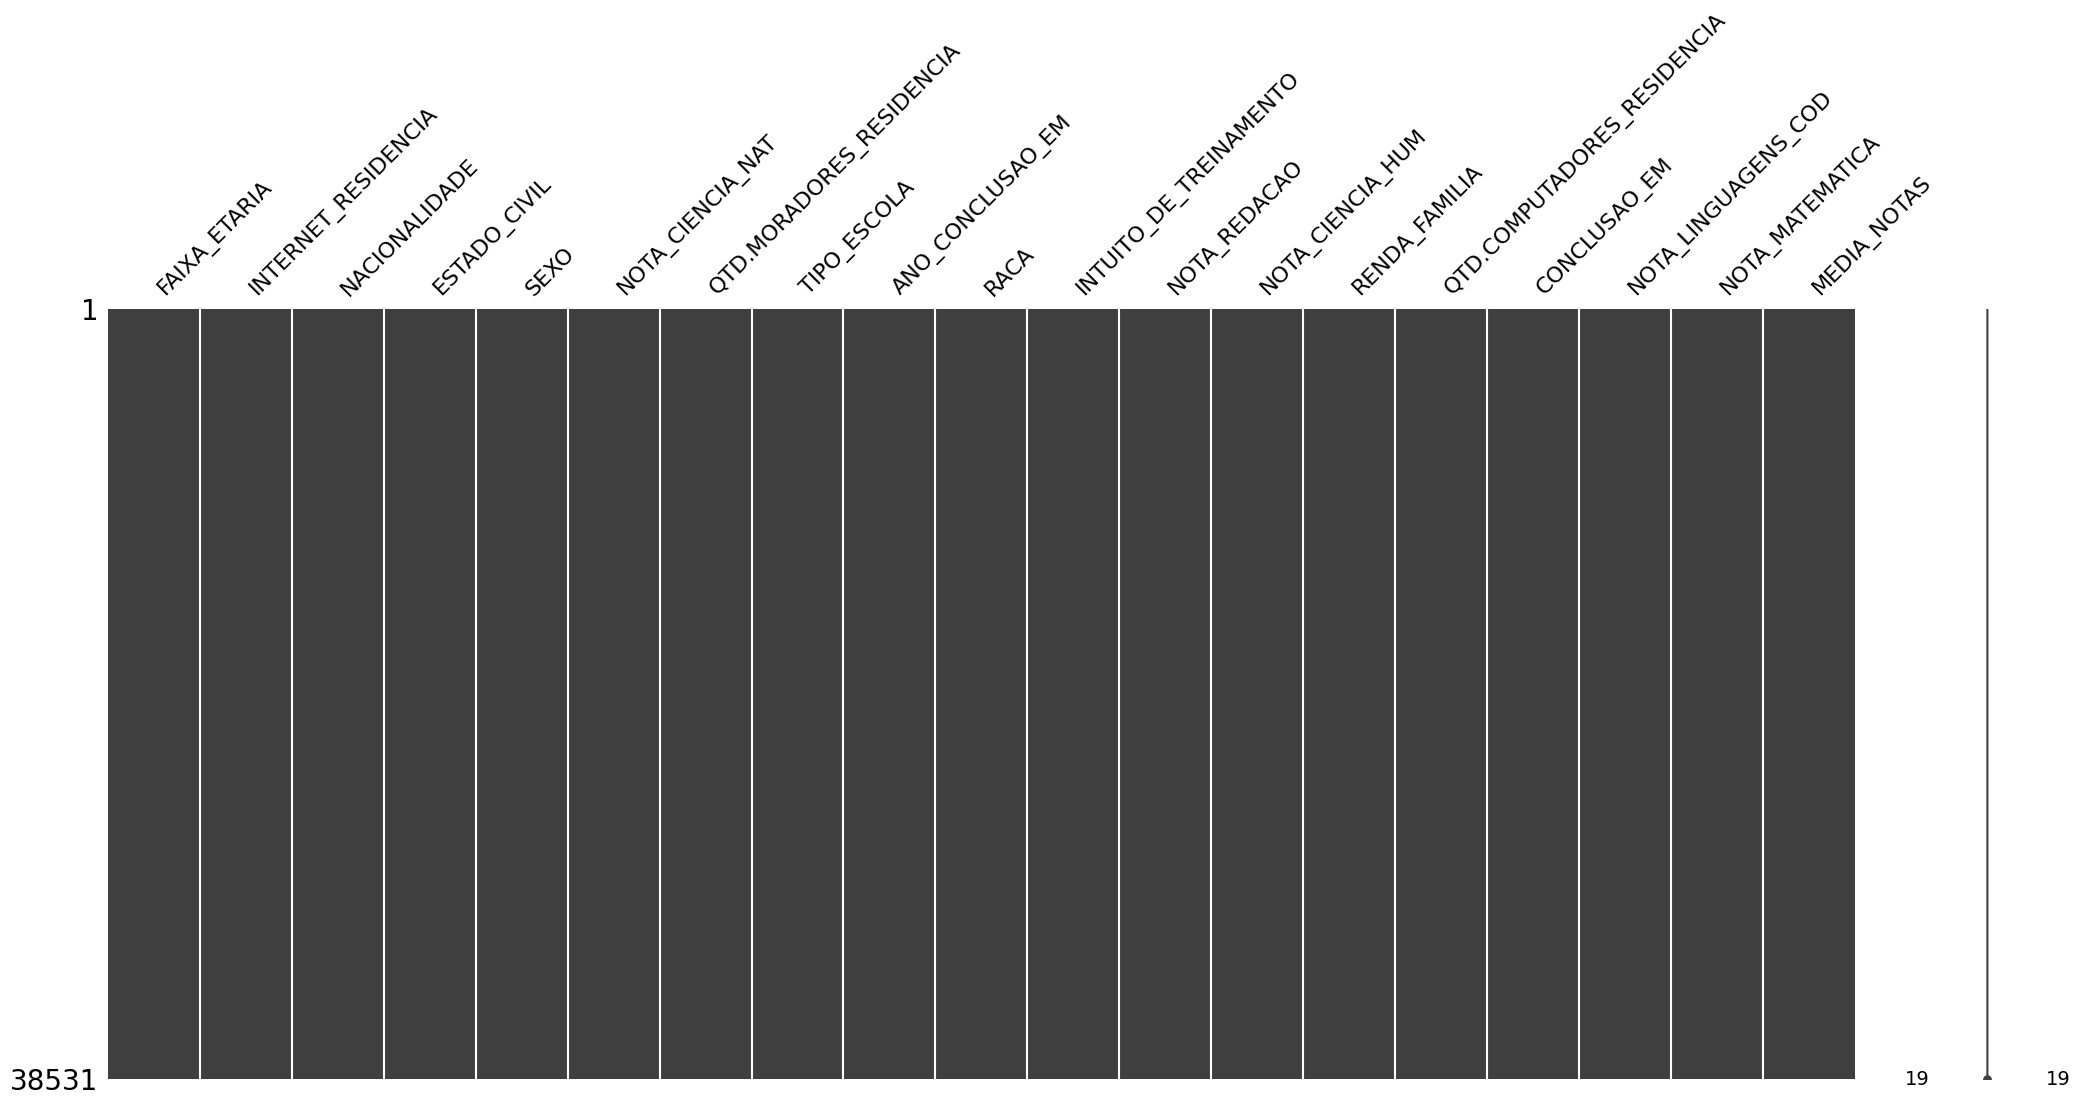

In [52]:
# APÓS TODAS TRATATIVAS, OPTEI POR DEIXAR A BASE DE DADOS SEM REGISTROS NULOS:

msno.matrix(base_enem_definitiva_2)

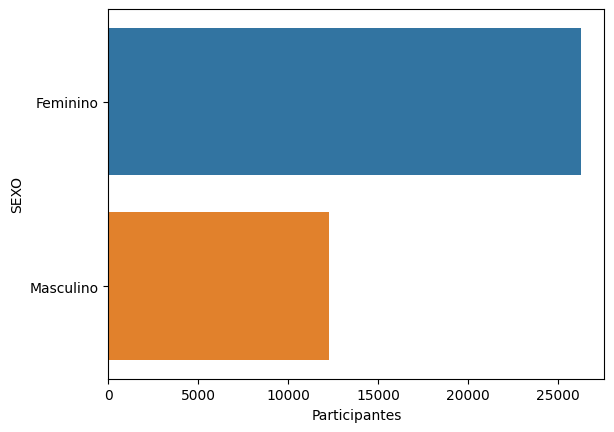

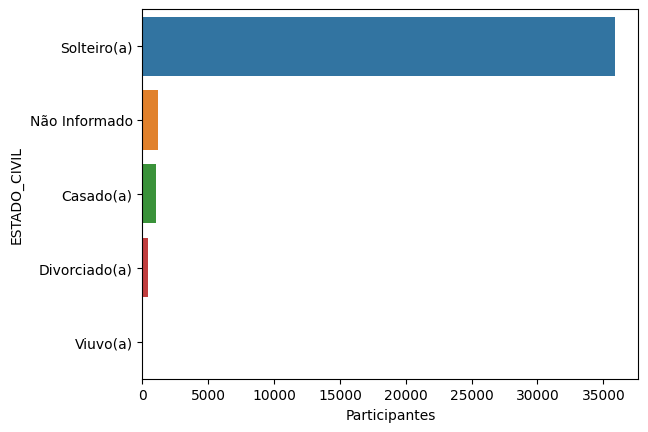

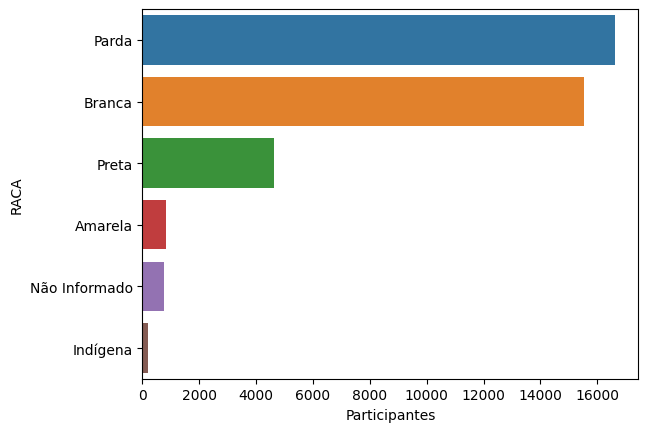

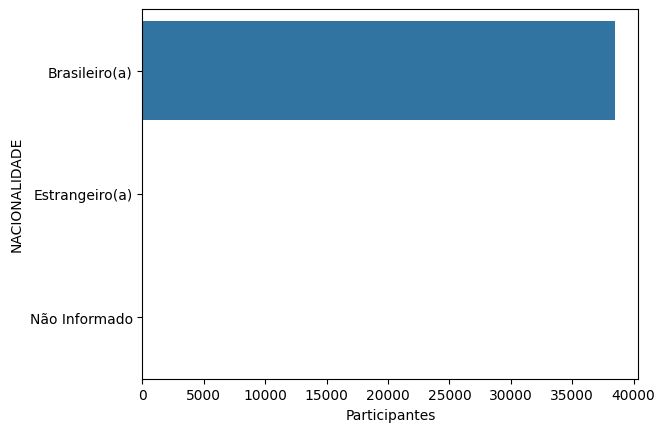

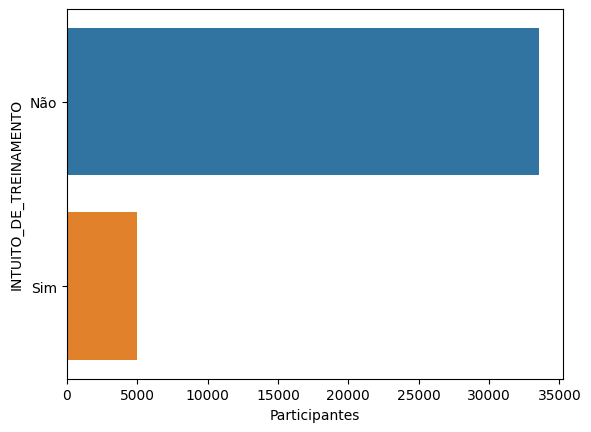

In [53]:
# GRÁFICO DAS VARIAVEIS QUALITATIVAS

for itens in informacoes_partic_qual:
  (base_enem_definitiva_2[[itens]]
  .value_counts(normalize = False, sort = True)
  .rename("Participantes")
  .reset_index()
  .pipe((sns.barplot, "data"), x="Participantes", y=itens))
  plt.show()

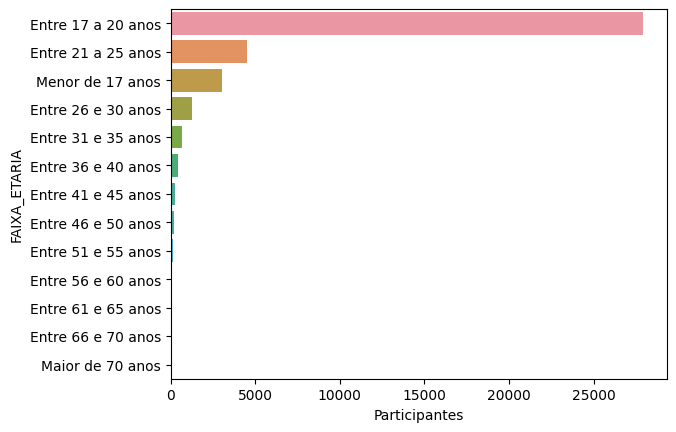

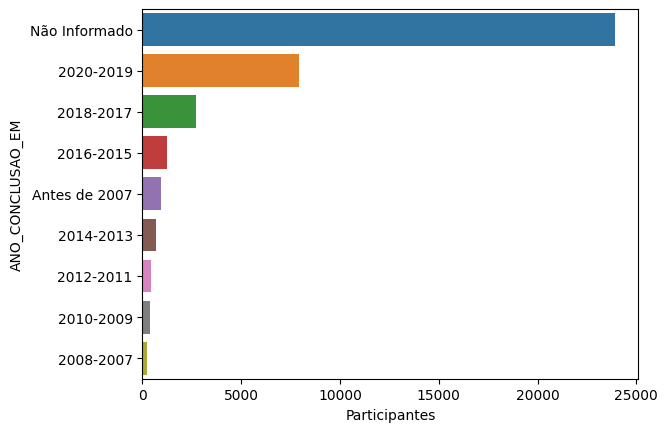

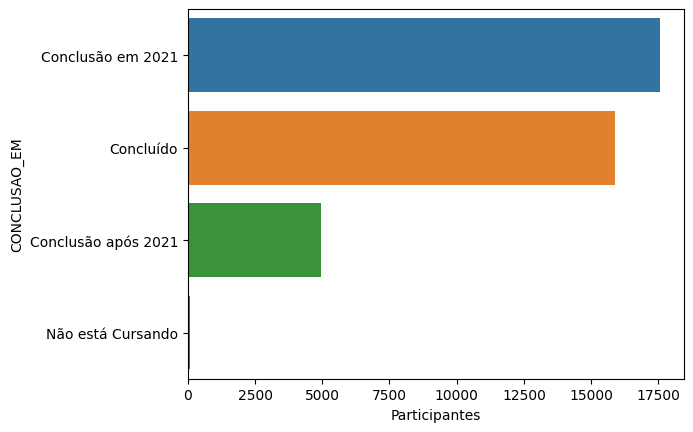

In [54]:
# GRÁFICOS DAS VARIAVEIS QUANTITATIVAS

for itens_2 in informacoes_partic_qual_2:
  (base_enem_definitiva_2[[itens_2]]
  .value_counts(normalize = False, sort = True)
  .rename("Participantes")
  .reset_index()
  .pipe((sns.barplot, "data"), x="Participantes", y=itens_2, orient="h"))
  plt.show()

Devido a grande quantidade de opções que foram geradas no gráfico para análise, obtei em realizar uma nova classificação (*por isso é sempre bom analisar os dados o mais completo possível, para evitar retrabalho como tive que fazer*)

A idade foi separada de acordo com a classificação etaria nacional.

**Referência**: http://www.geografia.seed.pr.gov.br/arquivos/File/sequencias_aulas_2013/estrutura_etaria_populacao.pdf

In [55]:
# REALIZANDO NOVO TRATAMENTO DAS VARIÁVEIS APONTADAS NO GRÁFICO ACIMA

base_enem_definitiva_2['FAIXA_ETARIA'] = base_enem_definitiva_2['FAIXA_ETARIA'].replace(['Entre 26 e 30 anos',
                                                                                        'Entre 31 e 35 anos',
                                                                                        'Entre 36 e 40 anos',
                                                                                        'Entre 41 e 45 anos',
                                                                                        'Entre 46 e 50 anos',
                                                                                        'Entre 51 e 55 anos',
                                                                                        'Entre 56 e 60 anos'],'Entre 21 a 25 anos')   # Entre 20 a 59 anos (Adultos)

base_enem_definitiva_2['FAIXA_ETARIA'] = base_enem_definitiva_2['FAIXA_ETARIA'].replace(['Entre 66 e 70 anos',
                                                                                        'Maior de 70 anos'],'Entre 61 e 65 anos')   # Maior de 60 anos (Idosos)

base_enem_definitiva_2['ANO_CONCLUSAO_EM'] = base_enem_definitiva_2['ANO_CONCLUSAO_EM'].replace(['2020-2019',
                                                                                                 '2018-2017',
                                                                                                 '2016-2015',
                                                                                                 '2014-2013',
                                                                                                 '2012-2011',
                                                                                                 '2010-2009'],'2008-2007')  # Entre 2020 a 2007

base_enem_definitiva_2['CONCLUSAO_EM'] = base_enem_definitiva_2['CONCLUSAO_EM'].replace(['Conclusão após 2021'],'Conclusão em 2021') # Cursando


In [57]:
# INSERINDO NOVAMENTE NAS VARIÁVEIS CRIADAS PARA A CATEGORIA

informacoes_partic_qual_2 = {'FAIXA_ETARIA':
                                      {'Menor de 17 anos':
                                      'Menor de 17 anos',
                                      'Entre 17 a 20 anos':
                                      'Entre 17 a 20 anos',
                                      'Entre 21 a 25 anos':
                                      'Entre 20 a 59 anos',
                                      'Entre 61 e 65 anos':
                                      'Maior de 60 anos'},
                                    'ANO_CONCLUSAO_EM':
                                      {'Não Informado':'Não Informado',
                                      '2008-2007':'Entre 2020 a 2007',
                                      'Antes de 2007':'Antes de 2007'},
                                    'CONCLUSAO_EM':
                                      {'Concluído':'Concluído',
                                      'Conclusão em 2021':'Cursando',
                                      'Não está Cursando':
                                      'Não está Cursando'}
                                    }

base_enem_definitiva_2 = base_enem_definitiva_2.replace(informacoes_partic_qual_2)

In [58]:
base_enem_definitiva_2['FAIXA_ETARIA'].unique(), base_enem_definitiva_2['ANO_CONCLUSAO_EM'].unique(), base_enem_definitiva_2['CONCLUSAO_EM'].unique()

(array(['Entre 17 a 20 anos', 'Entre 20 a 59 anos', 'Menor de 17 anos',
        'Maior de 60 anos'], dtype=object),
 array(['Entre 2020 a 2007', 'Não Informado', 'Antes de 2007'],
       dtype=object),
 array(['Concluído', 'Cursando', 'Não está Cursando'], dtype=object))

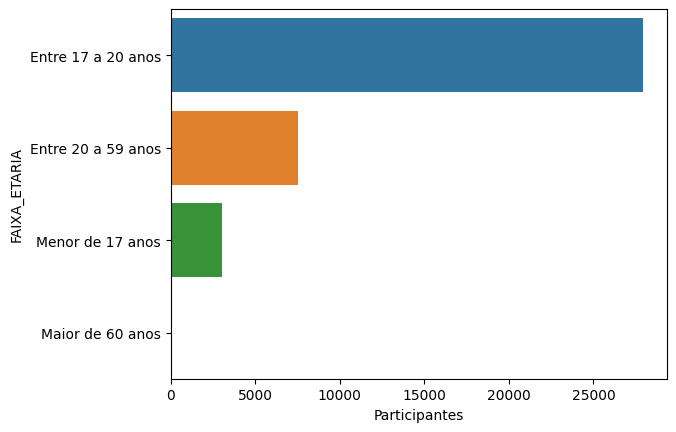

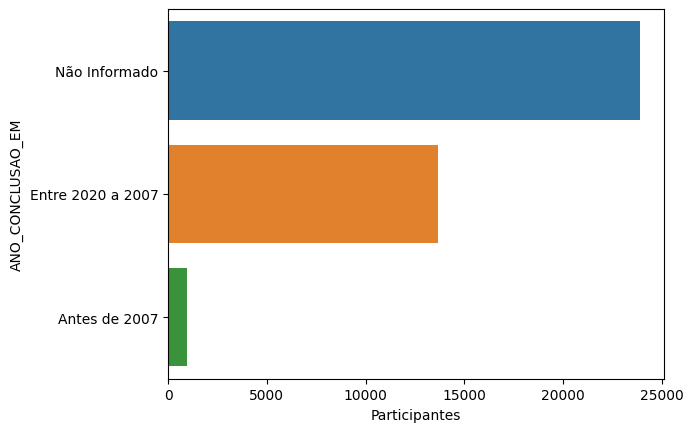

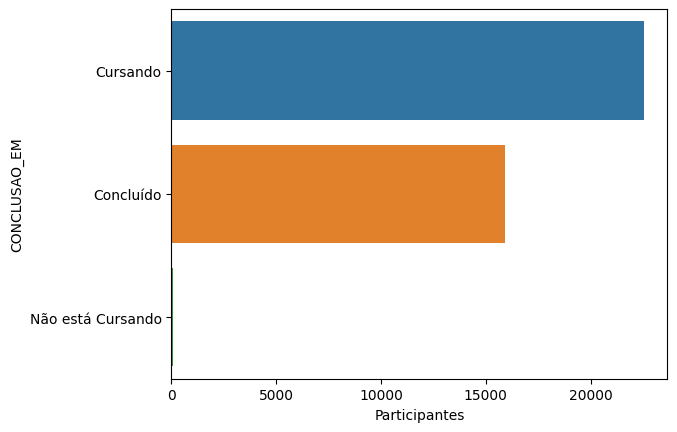

In [59]:
# GRÁFICOS DAS VARIAVEIS QUANTITATIVAS (APÓS NOVO TRATAMENTO)

for itens_2 in informacoes_partic_qual_2:
  (base_enem_definitiva_2[[itens_2]]
  .value_counts(normalize = False, sort = True)
  .rename("Participantes")
  .reset_index()
  .pipe((sns.barplot, "data"), x="Participantes", y=itens_2, orient="h"))
  plt.show()

<Axes: xlabel='MEDIA_NOTAS', ylabel='Count'>

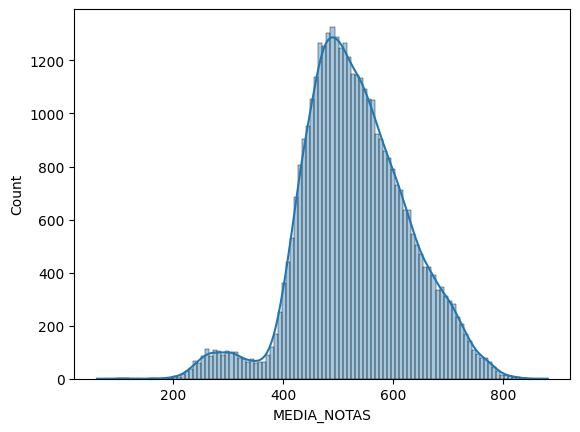

In [60]:
sns.histplot(base_enem_definitiva_2.MEDIA_NOTAS, alpha=0.4, kde=True, kde_kws={"cut": 3})

Para finalizar as visualizações gráficas farei mais algumas comparações entre as notas

TIPO_ESCOLA
Não Informado    Axes(0.125,0.11;0.775x0.77)
Particular       Axes(0.125,0.11;0.775x0.77)
Pública          Axes(0.125,0.11;0.775x0.77)
Name: MEDIA_NOTAS, dtype: object

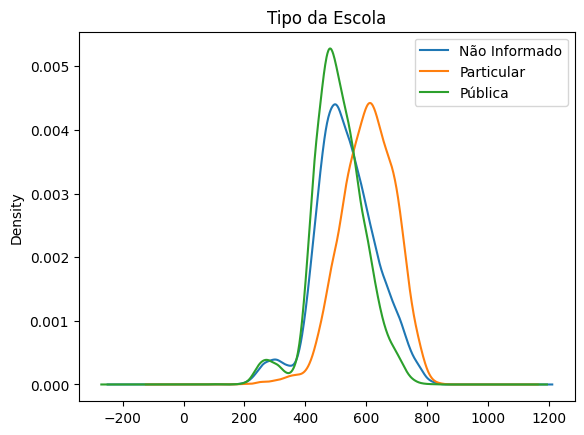

In [61]:
base_enem_definitiva_2.groupby('TIPO_ESCOLA').MEDIA_NOTAS.plot(kind='kde', legend=True, title='Tipo da Escola')


SEXO
Feminino     Axes(0.125,0.11;0.775x0.77)
Masculino    Axes(0.125,0.11;0.775x0.77)
Name: MEDIA_NOTAS, dtype: object

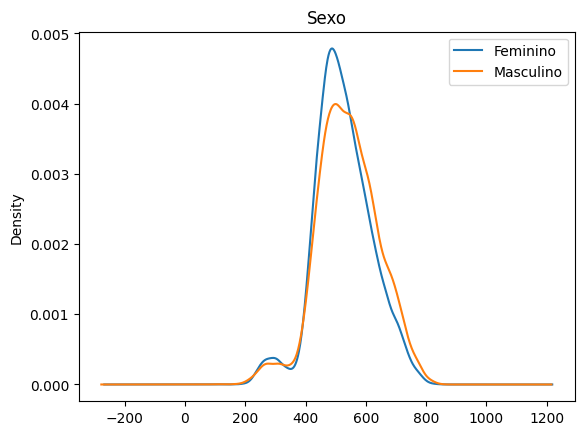

In [62]:
base_enem_definitiva_2.groupby('SEXO').MEDIA_NOTAS.plot(kind='kde', legend=True, title='Sexo')

INTUITO_DE_TREINAMENTO
Não    Axes(0.125,0.11;0.775x0.77)
Sim    Axes(0.125,0.11;0.775x0.77)
Name: MEDIA_NOTAS, dtype: object

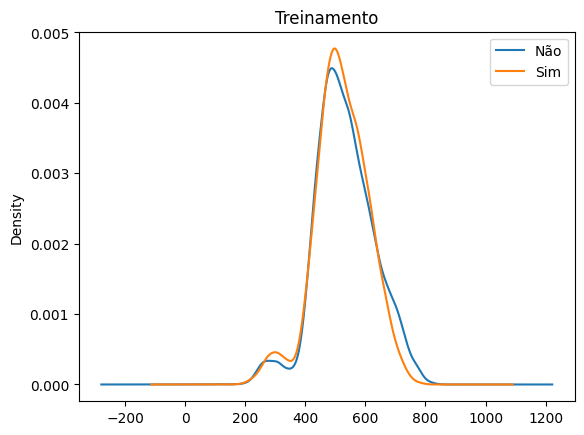

In [63]:
base_enem_definitiva_2.groupby('INTUITO_DE_TREINAMENTO').MEDIA_NOTAS.plot(kind='kde', legend=True, title='Treinamento')

ESTADO_CIVIL
Casado(a)        Axes(0.125,0.11;0.775x0.77)
Divorciado(a)    Axes(0.125,0.11;0.775x0.77)
Não Informado    Axes(0.125,0.11;0.775x0.77)
Solteiro(a)      Axes(0.125,0.11;0.775x0.77)
Viuvo(a)         Axes(0.125,0.11;0.775x0.77)
Name: MEDIA_NOTAS, dtype: object

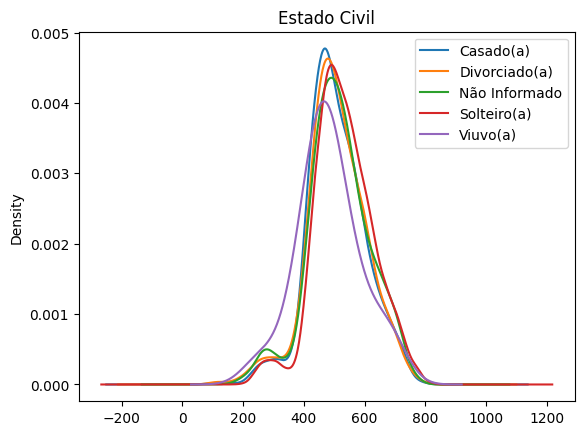

In [64]:
base_enem_definitiva_2.groupby('ESTADO_CIVIL').MEDIA_NOTAS.plot(kind='kde', legend=True, title='Estado Civil')

<Axes: xlabel='RACA', ylabel='MEDIA_NOTAS'>

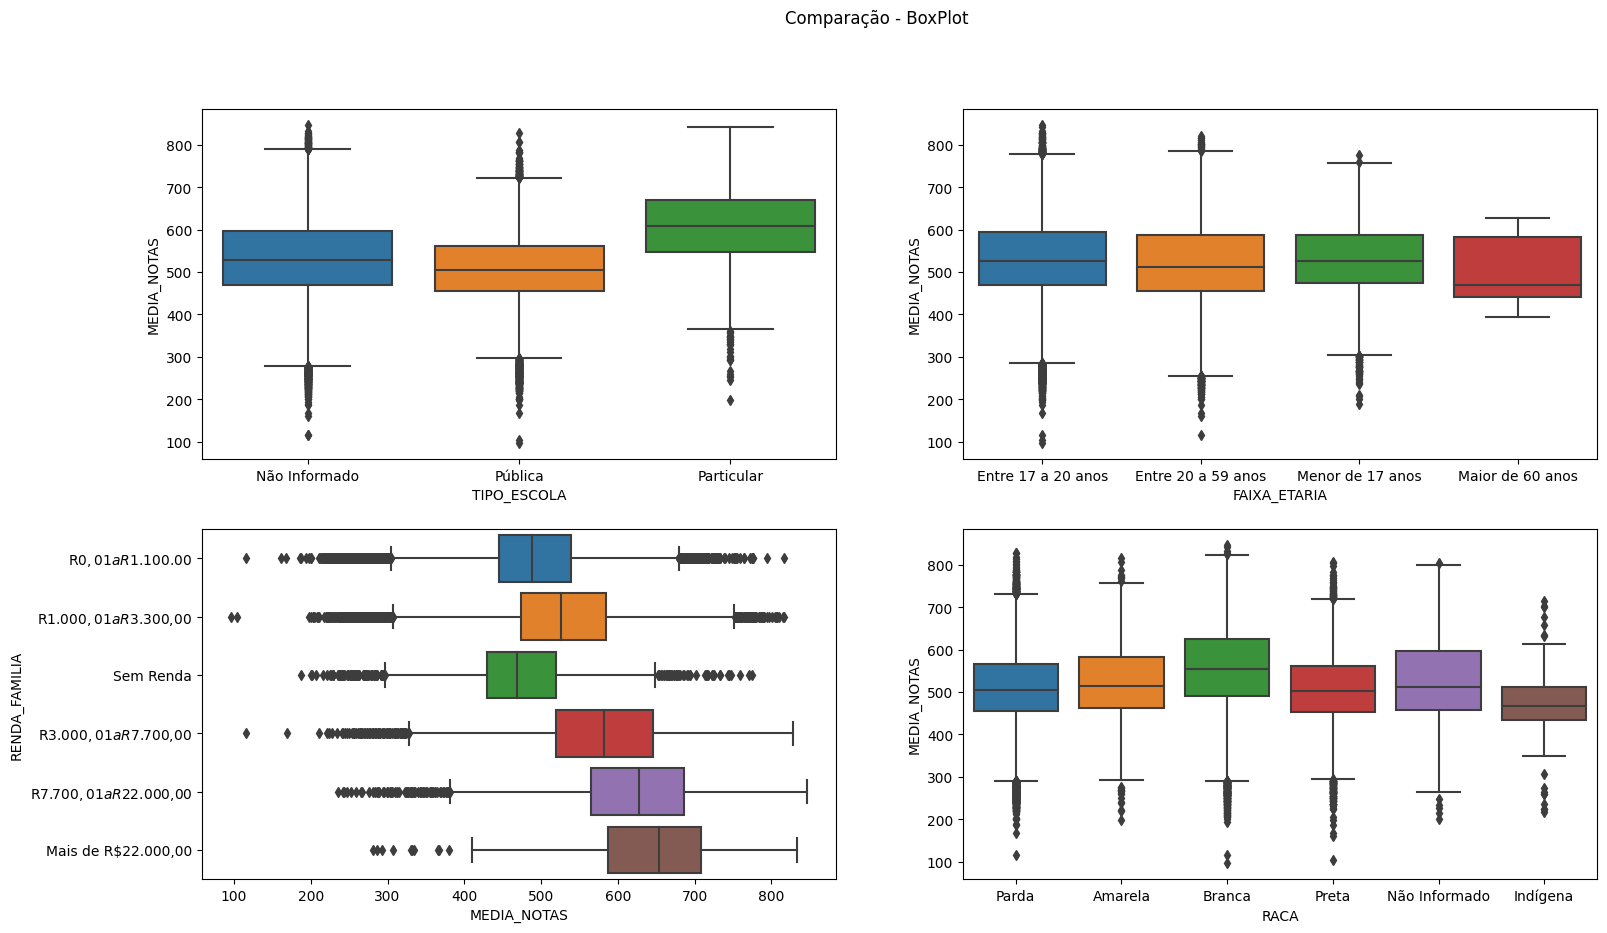

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Comparação - BoxPlot')
sns.boxplot(ax=axes[0, 0],x = 'TIPO_ESCOLA', y = 'MEDIA_NOTAS', data = base_enem_definitiva_2)
sns.boxplot(ax=axes[0, 1],x = 'FAIXA_ETARIA', y = 'MEDIA_NOTAS', data = base_enem_definitiva_2)
sns.boxplot(ax=axes[1, 0],x = 'MEDIA_NOTAS', y = 'RENDA_FAMILIA', data = base_enem_definitiva_2)
sns.boxplot(ax=axes[1, 1],x = 'RACA', y= 'MEDIA_NOTAS', data = base_enem_definitiva_2)

<Axes: xlabel='INTERNET_RESIDENCIA', ylabel='MEDIA_NOTAS'>

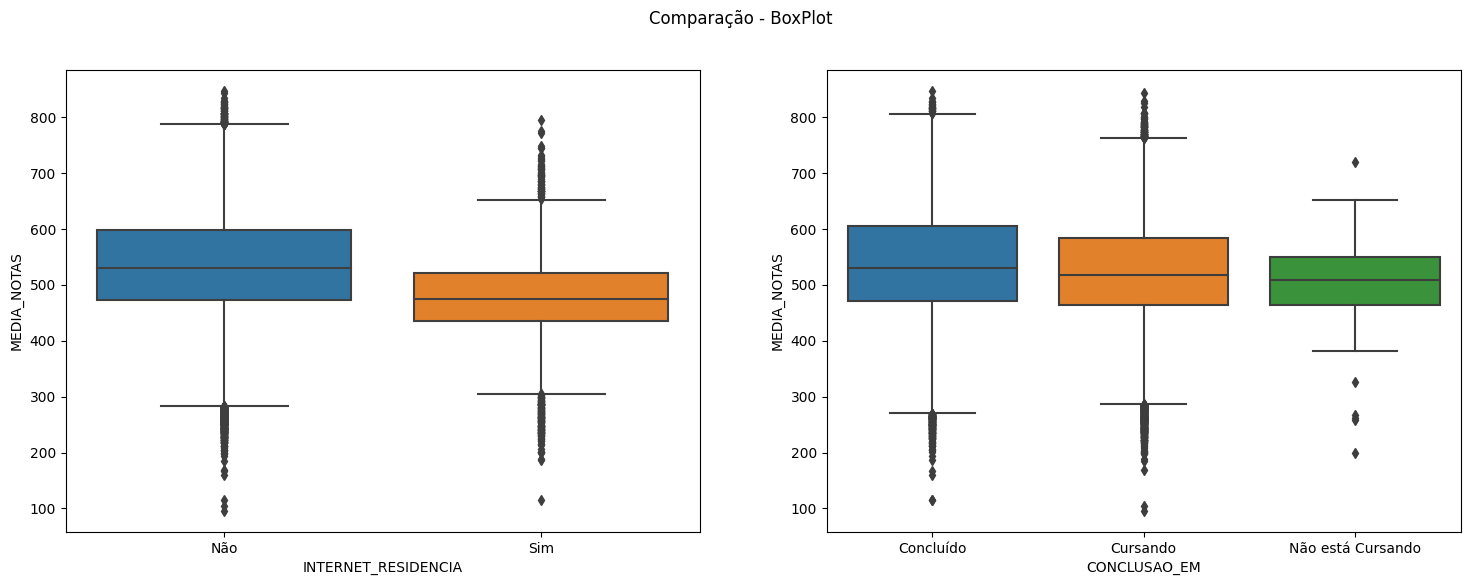

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Comparação - BoxPlot')
sns.boxplot(ax=axes[1],x = 'CONCLUSAO_EM', y = 'MEDIA_NOTAS', data = base_enem_definitiva_2)
sns.boxplot(ax=axes[0],x = 'INTERNET_RESIDENCIA', y = 'MEDIA_NOTAS', data = base_enem_definitiva_2)


Para trabalhar com os modelos de Regressão optei em escolher apenas 03 variáveis para analisar as informações, sendo as que apresentou maior variação (RACA, TIPO_ESCOLA, RENDA_FAMILIA) entre o target "MEDIA_NOTAS". A primeira parte será feita uma analise para modelos "EXPLICATIVOS"

In [67]:
# ANALISANDO A CORRELAÇÃO DE "TIPO_ESCOLA":

base_enem_definitiva_2[['MEDIA_NOTAS','TIPO_ESCOLA']].corr(method='pearson').astype(int)

,MEDIA_NOTAS
MEDIA_NOTAS,1


In [68]:
import statsmodels.formula.api as smf

# ANALISANDO A VARIÁVEL "TIPO_ESCOLA" PELA FUNÇÃO OLS:

modelo_simples_tipescola = smf.ols(formula = 'MEDIA_NOTAS ~ TIPO_ESCOLA', data = base_enem_definitiva_2)
modelo_simples_tipescola_fit = modelo_simples_tipescola.fit()
modelo_simples_tipescola_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MEDIA_NOTAS   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1297.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:32:27   Log-Likelihood:            -2.2989e+05
No. Observations:               38531   AIC:                         4.598e+05
Df Residuals:                   38528   BIC:                         4.598e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   533.3462      0.652    818.060      0.000     532.068     534.624
TIPO_ESCOLA[T.Particular]    72.2566      1.893     38.168      0.000      68.546      75.967
TIPO_ESCOLA[T.Pública]      -24.8028      1.015    -24.447      0.000     -26.791     -22.814
==============================================================================
Omnibus:                      455.394   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.907
Skew:                          -0.138   Prob(JB):                    5.61e-146
Kurtosis:                       3.584   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

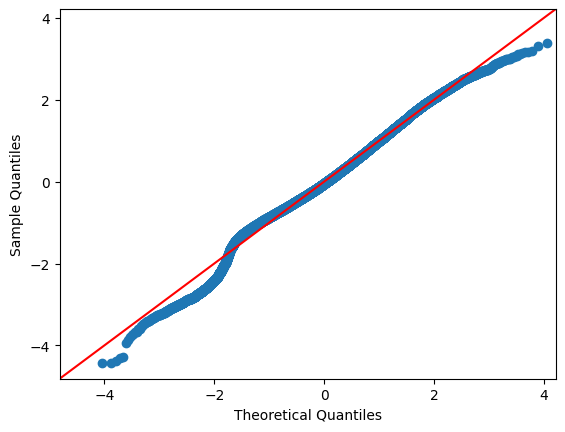

In [69]:
# GRÁFICO DE QQPLOT - ANALISANDO A NORMALIDADE

modelo_residuo_tipescola = modelo_simples_tipescola_fit.resid
modelo_y_ajustado_tipescola = modelo_simples_tipescola_fit.fittedvalues

sm.qqplot(modelo_residuo_tipescola, line="45", fit=True,dist=stats.norm)
plt.show()

In [70]:
# TESTE PARA NORMALIDADE DOS RESIDUOS - SHAPIRO E JARQUE_BERA

from scipy import stats
from scipy.stats import shapiro, jarque_bera

# SHAPIRO-WILK:
stat, p = shapiro(modelo_residuo_tipescola)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:print('A amostra parece normal (H-NULA NÃO REJEITADA)')
else:print('A amostra não parece normal (H-NULA REJEITADA)')

print('\n')

#KARQUE-BERA
stat, p = jarque_bera(modelo_residuo_tipescola)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:print('A amostra parece normal (H-NULA NÃO REJEITADA)')
else:print('A amostra não parece normal (H-NULA REJEITADA)')

Statistics=0.989, p=0.000
A amostra não parece normal (H-NULA REJEITADA)


Statistics=668.907, p=0.000
A amostra não parece normal (H-NULA REJEITADA)


In [71]:
# TESTE DE VARIANCIA (HOMOCEDASTICIDADE E HETEROCEDASTICIDADE)

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

### Breash-Pagan
nome_test = ["Breusch pagan statistic", "p-value"]
teste_heteroc = sms.het_breuschpagan(modelo_residuo_tipescola, modelo_simples_tipescola_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()
### Goldfeld-Quandt
nome_test = ["Goldfeld-Quandt statistic", "p-value"]
teste_heteroc = sms.het_goldfeldquandt(modelo_residuo_tipescola, modelo_simples_tipescola_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()
### White's
nome_test = ["White's statistic", "p-value"]
teste_heteroc = het_white(modelo_residuo_tipescola, modelo_simples_tipescola_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()

[('Breusch pagan statistic', 316.4338883461173), ('p-value', 1.9375557257912736e-69)]

[('Goldfeld-Quandt statistic', 0.9972904173041068), ('p-value', 0.574672709762956)]

[("White's statistic", 316.433888346113), ('p-value', 1.937555725795484e-69)]



**MEDIA_NOTAS** X **TIPO_ESCOLA**:

- Correlaçao (Pearson) Positiva (1)
- R² = 6% (MUITO BAIXO)
- P>|t| = Hipotese Nula Rejeitada, pois o valor está abaixo de 0.05
- coef = Tipo de Escola (Pública) possui uma variação na média de 20 pontos menor que a (Não Informada) e a (Particular) possui quase 80 pontos a mais.
- Teste de Normalidade Shapiro e Jarque: Hipotese Nula Rejeitada, pois o valor está abaixo de 0.05
- Teste de Variância utilizando 03 modelos, possuíndo em ambos variância não constante de heterocedásticidade, pois o p-valor está acima de 0.05

In [72]:
# ANALISANDO A CORRELAÇÃO DE "RACA":

base_enem_definitiva_2[['MEDIA_NOTAS','RACA']].corr(method='pearson').astype(int)

,MEDIA_NOTAS
MEDIA_NOTAS,1


In [73]:
# ANALISANDO A VARIÁVEL "RACA" PELA FUNÇÃO OLS:

modelo_simples_raca = smf.ols(formula = 'MEDIA_NOTAS ~ RACA', data = base_enem_definitiva_2)
modelo_simples_raca_fit = modelo_simples_raca.fit()
modelo_simples_raca_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MEDIA_NOTAS   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     449.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:32:50   Log-Likelihood:            -2.3005e+05
No. Observations:               38531   AIC:                         4.601e+05
Df Residuals:                   38525   BIC:                         4.602e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               521.8511      3.307    157.822      0.000     515.370     528.332
RACA[T.Branca]           34.7059      3.393     10.229      0.000      28.055      41.356
RACA[T.Indígena]        -51.4090      7.681     -6.693      0.000     -66.464     -36.355
RACA[T.Não Informado]     4.0131      4.763      0.843      0.399      -5.322      13.348
RACA[T.Parda]           -10.7008      3.387     -3.159      0.002     -17.340      -4.061
RACA[T.Preta]           -15.7998      3.588     -4.403      0.000     -22.833      -8.767
==============================================================================
Omnibus:                      488.133   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.867
Skew:                          -0.151   Prob(JB):                    4.34e-155
Kurtosis:                       3.593   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

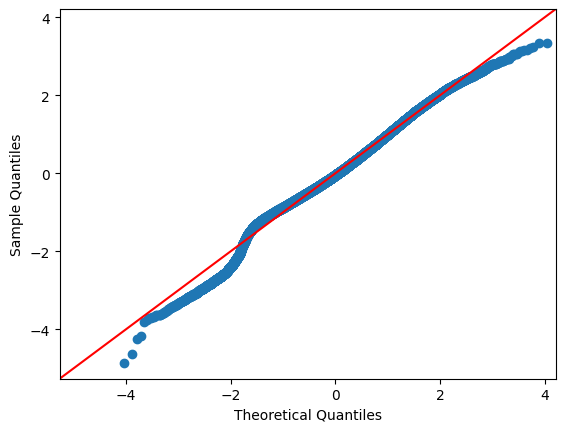

In [74]:
# GRÁFICO DE QQPLOT - ANALISANDO A NORMALIDADE

modelo_residuo_raca = modelo_simples_raca_fit.resid
modelo_y_ajustado_raca = modelo_simples_raca_fit.fittedvalues

sm.qqplot(modelo_residuo_raca, line="45", fit=True,dist=stats.norm)
plt.show()

In [75]:
# TESTE PARA NORMALIDADE DOS RESIDUOS - SHAPIRO E JARQUE_BERA

from scipy import stats
from scipy.stats import shapiro, jarque_bera

# SHAPIRO-WILK:
stat, p = shapiro(modelo_residuo_raca)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:print('A amostra parece normal (H-NULA NÃO REJEITADA)')
else:print('A amostra não parece normal (H-NULA REJEITADA)')

print('\n')

#KARQUE-BERA
stat, p = jarque_bera(modelo_residuo_raca)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:print('A amostra parece normal (H-NULA NÃO REJEITADA)')
else:print('A amostra não parece normal (H-NULA REJEITADA)')

Statistics=0.989, p=0.000
A amostra não parece normal (H-NULA REJEITADA)


Statistics=710.867, p=0.000
A amostra não parece normal (H-NULA REJEITADA)


In [76]:
# TESTE DE VARIANCIA (HOMOCEDASTICIDADE E HETEROCEDASTICIDADE)

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

### Breash-Pagan
nome_test = ["Breusch pagan statistic", "p-value"]
teste_heteroc = sms.het_breuschpagan(modelo_residuo_raca, modelo_simples_raca_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()
### Goldfeld-Quandt
nome_test = ["Goldfeld-Quandt statistic", "p-value"]
teste_heteroc = sms.het_goldfeldquandt(modelo_residuo_raca, modelo_simples_raca_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()
### White's
nome_test = ["White's statistic", "p-value"]
teste_heteroc = het_white(modelo_residuo_raca, modelo_simples_raca_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()

[('Breusch pagan statistic', 159.48257008284895), ('p-value', 1.2759454063896337e-32)]

[('Goldfeld-Quandt statistic', 1.0070624345565056), ('p-value', 0.3126586614199571)]

[("White's statistic", 158.83863922780716), ('p-value', 1.7500771981040951e-32)]



**MEDIA_NOTAS** X **RACA**:

- Correlaçao (Pearson) Positiva (1)
- R² = 5% (MUITO BAIXO)
- P>|t| = Hipotese Nula Aceita para a opção "Não Informado", pois o valor está acima de 0.05
- coef = Comparando a raça (Amarela) não plotada, temos apenas a (Branca) e a (Não Informada) com média de notas superior a ela, as demais possuem médias menor.
- Teste de Normalidade Shapiro e Jarque: Hipotese Nula Rejeitada, pois o valor está abaixo de 0.05
- Teste de Variância utilizando 03 modelos, possuíndo em ambos variância não constante de heterocedásticidade, pois o p-valor está acima de 0.05

In [77]:
# ANALISANDO A CORRELAÇÃO DE "RENDA_FAMILIA":

base_enem_definitiva_2[['MEDIA_NOTAS','RENDA_FAMILIA']].corr(method='pearson').astype(int)

,MEDIA_NOTAS
MEDIA_NOTAS,1


In [78]:
# ANALISANDO A VARIÁVEL "RENDA_FAMILIA" PELA FUNÇÃO OLS:

modelo_simples_renda = smf.ols(formula = 'MEDIA_NOTAS ~ RENDA_FAMILIA', data = base_enem_definitiva_2)
modelo_simples_renda_fit = modelo_simples_renda.fit()
modelo_simples_renda_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MEDIA_NOTAS   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     1725.
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:33:06   Log-Likelihood:            -2.2726e+05
No. Observations:               38531   AIC:                         4.545e+05
Df Residuals:                   38525   BIC:                         4.546e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                   642.5281      3.979    161.498      0.000     634.730     650.326
RENDA_FAMILIA[T.R$0,01 a R$1.100.00]       -152.2753      4.063    -37.476      0.000    -160.240    -144.311
RENDA_FAMILIA[T.R$1.000,01 a R$3.300,00]   -113.7175      4.038    -28.159      0.000    -121.633    -105.802
RENDA_FAMILIA[T.R$3.000,01 a R$7.700,00]    -63.1656      4.157    -15.194      0.000     -71.314     -55.017
RENDA_FAMILIA[T.R$7.700,01 a R$22.000,00]   -22.6168      4.316     -5.241      0.000     -31.076     -14.158
RENDA_FAMILIA[T.Sem Renda]                 -168.8403      4.382    -38.527      0.000    -177.430    -160.251
==============================================================================
Omnibus:                     1366.040   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2236.614
Skew:                          -0.321   Prob(JB):                         0.00
Kurtosis:                       3.990   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

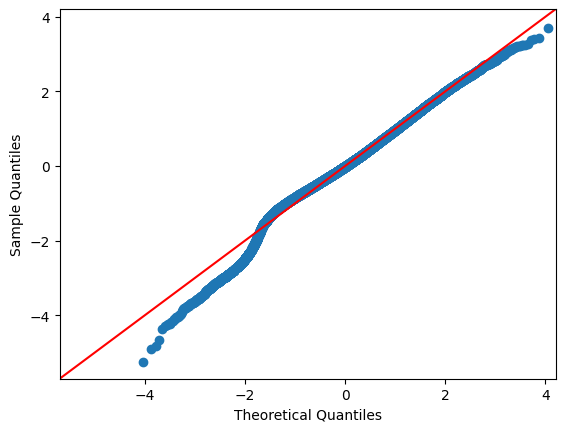

In [79]:
# GRÁFICO DE QQPLOT - ANALISANDO A NORMALIDADE

modelo_residuo_renda = modelo_simples_renda_fit.resid
modelo_y_ajustado_renda = modelo_simples_renda_fit.fittedvalues

sm.qqplot(modelo_residuo_renda, line="45", fit=True,dist=stats.norm)
plt.show()

In [80]:
# TESTE PARA NORMALIDADE DOS RESIDUOS - SHAPIRO E JARQUE_BERA

from scipy import stats
from scipy.stats import shapiro, jarque_bera

# SHAPIRO-WILK:
stat, p = shapiro(modelo_residuo_renda)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:print('A amostra parece normal (H-NULA NÃO REJEITADA)')
else:print('A amostra não parece normal (H-NULA REJEITADA)')

print('\n')

#KARQUE-BERA
stat, p = jarque_bera(modelo_residuo_renda)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:print('A amostra parece normal (H-NULA NÃO REJEITADA)')
else:print('A amostra não parece normal (H-NULA REJEITADA)')

Statistics=0.985, p=0.000
A amostra não parece normal (H-NULA REJEITADA)


Statistics=2236.614, p=0.000
A amostra não parece normal (H-NULA REJEITADA)


In [81]:
# TESTE DE VARIANCIA (HOMOCEDASTICIDADE E HETEROCEDASTICIDADE)

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white

### Breash-Pagan
nome_test = ["Breusch pagan statistic", "p-value"]
teste_heteroc = sms.het_breuschpagan(modelo_residuo_renda, modelo_simples_renda_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()
### Goldfeld-Quandt
nome_test = ["Goldfeld-Quandt statistic", "p-value"]
teste_heteroc = sms.het_goldfeldquandt(modelo_residuo_renda, modelo_simples_renda_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()
### White's
nome_test = ["White's statistic", "p-value"]
teste_heteroc = het_white(modelo_residuo_renda, modelo_simples_renda_fit.model.exog)
print(lzip(nome_test, teste_heteroc))
print()

[('Breusch pagan statistic', 135.80167813058725), ('p-value', 1.3956450706918587e-27)]

[('Goldfeld-Quandt statistic', 0.9789268234578654), ('p-value', 0.9302755861777664)]

[("White's statistic", 135.80090958581278), ('p-value', 1.3961698027166584e-27)]



**MEDIA_NOTAS** X **RENDA_FAMILIA**:

- Correlaçao (Pearson) Positiva (1)
- R² = 18% (BAIXO)
- P>|t| = Hipotese Nula Rejeitada, pois o valor está abaixo de 0.05
- coef = Comparado a renda (Superior a R$22.000,00) todas as outras possuem um média de nota inferior a esta classe, sendo a (Sem Renda) possuindo uma diferente de quase 170 pontos menor.
- Teste de Normalidade Shapiro e Jarque: Hipotese Nula Rejeitada, pois o valor está abaixo de 0.05
- Teste de Variância utilizando 03 modelos, possuíndo em ambos variância não constante de heterocedásticidade, pois o p-valor está acima de 0.05

Realizando analise de Regressão Linear Multipla em modelos preditivos:

In [82]:
# BIBLIOTECAS NECESSARIAS:

from sklearn.preprocessing import LabelEncoder, Normalizer, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

Para iniciar a parte de treinamento obtei em realizar a transformação apenas das 03 variáveis (categoricas) que foram analisadas antes. Como não vou usar o dataset completo, optei e fazer a transformação usando o "LabelEncoder" antes de separar os dados em teste e treino.  

In [83]:
# TRANSFORMAÇÃO "LABELENCONDER" DAS VARIAVEIS CATEGORICAS QUE SERÃO UTILIZADA:

%%time
label_enconder = LabelEncoder()
base_enem_definitiva_2['TIPO_ESCOLA_ENCODE'] = label_enconder.fit_transform(base_enem_definitiva_2['TIPO_ESCOLA'])
base_enem_definitiva_2['RACA_ENCODE'] = label_enconder.fit_transform(base_enem_definitiva_2['RACA'])
base_enem_definitiva_2['RENDA_FAMILIA_ENCODE'] = label_enconder.fit_transform(base_enem_definitiva_2['RENDA_FAMILIA'])

CPU times: user 41.5 ms, sys: 2.37 ms, total: 43.8 ms
Wall time: 46.8 ms


In [84]:
base_enem_definitiva_2.head(5)

,FAIXA_ETARIA,INTERNET_RESIDENCIA,NACIONALIDADE,ESTADO_CIVIL,SEXO,NOTA_CIENCIA_NAT,QTD.MORADORES_RESIDENCIA,TIPO_ESCOLA,ANO_CONCLUSAO_EM,RACA,...,NOTA_CIENCIA_HUM,RENDA_FAMILIA,QTD.COMPUTADORES_RESIDENCIA,CONCLUSAO_EM,NOTA_LINGUAGENS_COD,NOTA_MATEMATICA,MEDIA_NOTAS,TIPO_ESCOLA_ENCODE,RACA_ENCODE,RENDA_FAMILIA_ENCODE
1,Entre 17 a 20 anos,Não,Brasileiro(a),Solteiro(a),Feminino,407.8,6.0,Não Informado,Entre 2020 a 2007,Parda,...,555.2,"R$0,01 a R$1.100.00",Um,Concluído,555.3,374.5,546.56,0,4,1
2,Entre 20 a 59 anos,Sim,Brasileiro(a),Não Informado,Feminino,446.7,2.0,Não Informado,Entre 2020 a 2007,Parda,...,466.5,"R$0,01 a R$1.100.00",Nenhum,Concluído,375.1,448.6,431.38,0,4,1
3,Entre 17 a 20 anos,Não,Brasileiro(a),Solteiro(a),Feminino,363.8,3.0,Pública,Não Informado,Amarela,...,572.1,"R$1.000,01 a R$3.300,00",Nenhum,Cursando,522.8,610.3,565.80,2,0,2
4,Entre 17 a 20 anos,Não,Brasileiro(a),Solteiro(a),Feminino,441.2,8.0,Particular,Não Informado,Amarela,...,420.6,"R$1.000,01 a R$3.300,00",Um,Cursando,497.5,581.3,576.12,1,0,2
5,Entre 17 a 20 anos,Não,Brasileiro(a),Solteiro(a),Feminino,379.7,5.0,Pública,Não Informado,Branca,...,362.3,"R$0,01 a R$1.100.00",Nenhum,Cursando,360.1,439.1,408.24,2,1,1


In [85]:
# ANALISANDO AS VARIAVEIS APÓS TRASNFORMAÇÃO:

print(f"Tipo Escola: {base_enem_definitiva_2['TIPO_ESCOLA_ENCODE'].unique()}\
\nRaça:{base_enem_definitiva_2['RACA_ENCODE'].unique()}\
\nRenda Familia: {base_enem_definitiva_2['RENDA_FAMILIA_ENCODE'].unique()}")

Tipo Escola: [0 2 1]
Raça:[4 0 1 5 3 2]
Renda Familia: [1 2 5 3 4 0]


In [86]:
# SEPARAÇÃO DOS DADOS EM TREINO E TESTE

X = base_enem_definitiva_2[['TIPO_ESCOLA_ENCODE','RACA_ENCODE','RENDA_FAMILIA_ENCODE']]
y = base_enem_definitiva_2['MEDIA_NOTAS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=None, random_state=42)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30824, 3), (7707, 3), (30824,), (7707,))

In [88]:
# IMPORTANDO E UTILIZANDO A REGRESSÃO LINEAR MULTIPLA
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf = clf.fit(X_train,y_train)

# PREDIÇÕES DO MODELO
y_pred = clf.predict(X_test)

In [89]:
r2_score(y_test, y_pred)

0.07962594265114153

In [90]:
# CONDICIONAL PARA AVALIÇÃO DO R-SQUARED USANDO O "LABEL ENCODER":

if r2_score(y_test, y_pred) < 40:
    print(f'Co-effecient of determination: {r2_score(y_test, y_pred).round(2)} (Muito Baixo)')
elif r2_score(y_test, y_pred) >= 40 and r2_score(y_test, y_pred) < 70:
    print(f'Co-effecient of determination: {r2_score(y_test, y_pred).round(2)} (Baixo)')
elif r2_score(y_test, y_pred) >= 70 and r2_score(y_test, y_pred) < 80:
  print(f'Co-effecient of determination: {r2_score(y_test, y_pred).round(2)} (Considerável)')
elif r2_score(y_test, y_pred) >= 80 and r2_score(y_test, y_pred) < 90:
  print(f'Co-effecient of determination: {r2_score(y_test, y_pred).round(2)} (Bom)')
elif r2_score(y_test, y_pred) >= 90 and r2_score(y_test, y_pred) < 99:
  print(f'Co-effecient of determination: {r2_score(y_test, y_pred).round(2)} (Ótimo)')
else:
  print(f'Co-effecient of determination: {r2_score(y_test, y_pred).round(2)} (OVERFITTING)')


Co-effecient of determination: 0.08 (Muito Baixo)


A forma escolhida para treinamento do modelo preditico como o explicativo também aapresentou um resultado muito baixo de R², o problema pode ter ocorrido pelos procedimentos escolhidos de transformação. Realizarei uma nova análise tranformando as variáveis em binários pelo Hot-Encoding.

In [91]:
# TRANSFORMAÇÃO "ONE-HOT-ENCODER/DUMMIES" DAS VARIAVEIS CATEGORICAS QUE SERÃO UTILIZADA:

dados = pd.DataFrame(base_enem_definitiva_2[['TIPO_ESCOLA','RACA','RENDA_FAMILIA']])
base_enem_definitiva_ohc = pd.get_dummies(dados, columns = ['TIPO_ESCOLA','RACA','RENDA_FAMILIA'])

In [92]:
base_enem_definitiva_ohc.head()

,TIPO_ESCOLA_Não Informado,TIPO_ESCOLA_Particular,TIPO_ESCOLA_Pública,RACA_Amarela,RACA_Branca,RACA_Indígena,RACA_Não Informado,RACA_Parda,RACA_Preta,"RENDA_FAMILIA_Mais de R$22.000,00","RENDA_FAMILIA_R$0,01 a R$1.100.00","RENDA_FAMILIA_R$1.000,01 a R$3.300,00","RENDA_FAMILIA_R$3.000,01 a R$7.700,00","RENDA_FAMILIA_R$7.700,01 a R$22.000,00",RENDA_FAMILIA_Sem Renda
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [93]:
# SEPARAÇÃO DOS DADOS EM TREINO E TESTE USANDO AS APENAS A BASE COM AS VARIAVÉIS TRATADAS:

X = base_enem_definitiva_ohc
y = base_enem_definitiva_2['MEDIA_NOTAS']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify=None, random_state=42)

In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30824, 3), (7707, 3), (30824,), (7707,))

In [95]:
# IMPORTANDO E UTILIZANDO A REGRESSÃO LINEAR MULTIPLA
from sklearn.linear_model import LinearRegression

clf2 = LinearRegression()
clf2 = clf.fit(X_train2,y_train2)

# PREDIÇÕES DO MODELO
y_pred2 = clf.predict(X_test2)

In [96]:
r2_score(y_test2, y_pred2)

0.2123714578915057

In [97]:
# CONDICIONAL PARA AVALIÇÃO DO R-SQUARED USANDO O "HOT-ENCODING/DUMMIES":

if r2_score(y_test2, y_pred2) < 40:
    print(f'Co-effecient of determination: {r2_score(y_test2, y_pred2).round(2)} (Muito Baixo)')
elif r2_score(y_test2, y_pred2) >= 40 and r2_score(y_test2, y_pred2) < 70:
    print(f'Co-effecient of determination: {r2_score(y_test2, y_pred2).round(2)} (Baixo)')
elif r2_score(y_test2, y_pred2) >= 70 and r2_score(y_test2, y_pred2) < 80:
  print(f'Co-effecient of determination: {r2_score(y_test2, y_pred2).round(2)} (Considerável)')
elif r2_score(y_test2, y_pred2) >= 80 and r2_score(y_test2, y_pred2) < 90:
  print(f'Co-effecient of determination: {r2_score(y_test2, y_pred2).round(2)} (Bom)')
elif r2_score(y_test2, y_pred2) >= 90 and r2_score(y_test2, y_pred2) < 99:
  print(f'Co-effecient of determination: {r2_score(y_test2, y_pred2).round(2)} (Ótimo)')
else:
  print(f'Co-effecient of determination: {r2_score(y_test2, y_pred2).round(2)} (OVERFITTING)')

Co-effecient of determination: 0.21 (Muito Baixo)


Depois de realizar outra tática de transformação, foi possível notar uma melhora no R-Squared se comparado ao primeiro modelo, mas o valor ainda continua baixo, porém mais próximo dos valores que conseguimos analisando uma determinada viariável na parte explicativa do statsmodels (OLS).

OBS.: Como citado antes, a forma de transformação do "LabelEncoder" não foi boa para o cenário de dados continuos, provavelmente a forma que ela transformou as categorias (numeração atribuída) causou uma queda muito grande do nosso R-Squared.